# **Task**

Task is aimed on building the binary classification model on anonymized features.
Features starting with cat_ - categorical, with num_ - numerical.

# **Libraries**

In [150]:
!pip install imbalanced-learn

In [151]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import classification_report, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, average_precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# **Data Loading**

In [152]:
DATA_PATH = 'train_df.csv'

In [153]:
df = pd.read_csv(DATA_PATH, delimiter = '\t')
df.head()

Unnamed: 0   num_1   num_2  num_3   num_4   num_5   num_6  num_7  cat_1  \
0           0  1377.3  3712.9    NaN  1303.0  2409.0  1281.7   43.0      1   
1           1    20.0    13.4    NaN   565.0     NaN   357.2   19.0      1   
2           4   150.6     1.8    NaN  2294.0    15.0   107.6   76.0      1   
3           5    11.4   178.0    NaN  1236.0     NaN   350.6   41.0      1   
4           6  5372.0  3386.0    NaN  1340.0     NaN    14.0   45.0      1   

   num_8  ...  num_413  cat_132  cat_133      num_414  num_415  num_416  \
0  195.0  ...  11327.5        1        1  28162496.65      0.0     0.07   
1  170.0  ...    168.6        1        1    989383.82      0.0     0.56   
2  196.0  ...    209.1        1        1     87444.51      0.0     0.01   
3  117.0  ...     56.9        1        1    297608.00      0.0     0.08   
4    9.0  ...     31.0        1        1   6614247.89      0.0     0.20   

   cat_134  cat_135  id  gb  
0        1        1   1   0  
1        2        1   2   0  
2        3        1   3   0  
3        4        1   4   0  
4        1        1   5   0  

[5 rows x 554 columns]

In [154]:
df[['Unnamed: 0', 'id']]

Unnamed: 0    id
0               0     1
1               1     2
2               4     3
3               5     4
4               6     5
...           ...   ...
26819       61104  5242
26820       61105  4320
26821       61108  2516
26822       61110  4610
26823       61111  5243

[26824 rows x 2 columns]

In [155]:
df['id'].nunique()

5243

In [156]:
df['Unnamed: 0'].nunique()

26824

In [157]:
df.set_index('Unnamed: 0', inplace=True)

In [158]:
df.head()

num_1   num_2  num_3   num_4   num_5   num_6  num_7  cat_1  \
Unnamed: 0                                                                
0           1377.3  3712.9    NaN  1303.0  2409.0  1281.7   43.0      1   
1             20.0    13.4    NaN   565.0     NaN   357.2   19.0      1   
4            150.6     1.8    NaN  2294.0    15.0   107.6   76.0      1   
5             11.4   178.0    NaN  1236.0     NaN   350.6   41.0      1   
6           5372.0  3386.0    NaN  1340.0     NaN    14.0   45.0      1   

            num_8  num_9  ...  num_413  cat_132  cat_133      num_414  \
Unnamed: 0                ...                                           
0           195.0    NaN  ...  11327.5        1        1  28162496.65   
1           170.0    NaN  ...    168.6        1        1    989383.82   
4           196.0    2.3  ...    209.1        1        1     87444.51   
5           117.0    5.3  ...     56.9        1        1    297608.00   
6             9.0  108.0  ...     31.0        1        1   6614247.89   

            num_415  num_416  cat_134  cat_135  id  gb  
Unnamed: 0                                              
0               0.0     0.07        1        1   1   0  
1               0.0     0.56        2        1   2   0  
4               0.0     0.01        3        1   3   0  
5               0.0     0.08        4        1   4   0  
6               0.0     0.20        1        1   5   0  

[5 rows x 553 columns]

# **Data Understanding**

In [159]:
df.shape

(26824, 553)

In [160]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 26824 entries, 0 to 61111
Data columns (total 553 columns):
 #    Column   Non-Null Count  Dtype  
---   ------   --------------  -----  
 0    num_1    23028 non-null  float64
 1    num_2    22953 non-null  float64
 2    num_3    63 non-null     float64
 3    num_4    26816 non-null  float64
 4    num_5    17209 non-null  float64
 5    num_6    26824 non-null  float64
 6    num_7    26816 non-null  float64
 7    cat_1    26824 non-null  int64  
 8    num_8    26492 non-null  float64
 9    num_9    16364 non-null  float64
 10   num_10   21186 non-null  float64
 11   num_11   36 non-null     float64
 12   num_12   7816 non-null   float64
 13   num_13   26816 non-null  float64
 14   num_14   25860 non-null  float64
 15   num_15   26816 non-null  float64
 16   num_16   11530 non-null  float64
 17   num_17   10350 non-null  float64
 18   num_18   535 non-null    float64
 19   num_19   26824 non-null  float64
 20   num_20   445 non-null    float6

In [161]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [162]:
numerical_columns = df.select_dtypes(include=[np.float64]).columns.tolist()
len(numerical_columns)

416

In [163]:
categorical_columns = df.select_dtypes(include=[np.int64]).columns.tolist()
len(categorical_columns) - 1

136

In [164]:
missing_values_percent = df.isna().sum().sum() / (df.shape[0] * (df.shape[1] - 1))
print(f"Overall Percentage of Missing Values = {round(missing_values_percent * 100, 2)}%")

Overall Percentage of Missing Values = 29.44%


In [165]:
threshold = 0.9

missing_percentage = (df.isnull().mean() * 100).round(2)
columns_with_high_missing = missing_percentage[missing_percentage > threshold * 100].index.tolist()

print(f"{len(columns_with_high_missing)} columns with more than {round(threshold * 100)}% missing values")


133 columns with more than 90% missing values


In [166]:
df.duplicated().sum()

0

## **Target Understanding**

In [167]:
df['gb'].unique()

array([0, 1])

<Axes: xlabel='gb', ylabel='Count'>

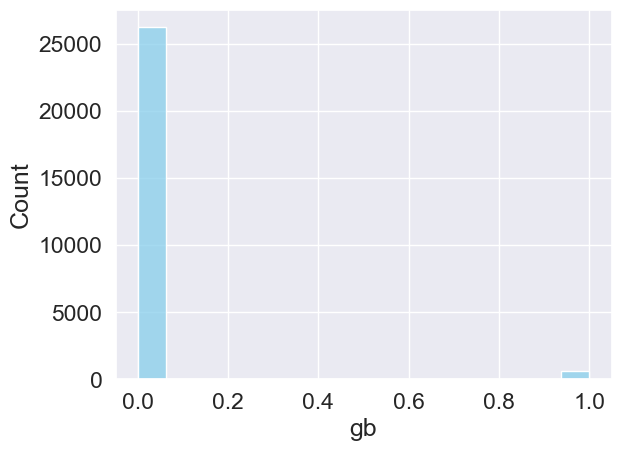

In [168]:
sns.histplot(df['gb'], color='skyblue')

In [169]:
major_class_count = (df['gb'] == 0).sum()
major_class_count

26231

In [170]:
minor_class_count = df.shape[0] - major_class_count
minor_class_count

593

## **Summary**

* #### Задача полягає у побудові моделі бінарної класифікації зі значним дизбалансом класів (0 -- 26231, 1 -- 593).
* #### Маємо 553 показника (416 - числові та 137 - категоріальні)
* #### Значення категоріальних показників вже переведено у числові дискретні еквіваленти
* #### 30% даних відсутні, маємо 233 показника, в яких з усіх прикладів присутні не більше ніж 10% 

# **Metrics**
#### Враховуючи сильний дизбаланс классів, буду використовувати метрики F1 та AUC-PR. Вони дадуть нам змогу коректно оцінювати результати роботи побудованої моделі, адже оцінюють точніть(precision) та повноту(recall), де

#### точність - це відношення кількості прикладів, які дійсно належали до даного класу і ми змогли їх передбачити, до кількості всіх прикладів, які модель передбачила даним класом.

#### повнота - це відношення кількості прикладів, які дійсно належали до даного класу і ми змогли їх передбачити, до кількості всіх прикладів, які належать дайному класу.

In [171]:
def metrics_calculator(clf, X_test, y_test, model_name):

    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                average_precision_score(y_test, y_pred, average='macro')
                               ],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score', 'Macro Avg Precision'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result


def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):

    skyblue_cmap = LinearSegmentedColormap.from_list('skyblue', ['#87CEEB', '#007ACC'])
    sns.set(font_scale=1.5)

    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))


    result = metrics_calculator(clf, X_train, y_train, model_name)

    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)

    ax1.axis('tight')
    ax1.axis('off')
    ax1.set_title('{} Performance Summary on Train Data'.format(model_name), fontsize=18, y=1.05)

    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('skyblue')

    ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, colorbar=False, cmap=skyblue_cmap, ax=ax2)
    ax2.set_title('Confusion Matrix for Train Data')
    ax2.grid(False)

    plt.tight_layout()
    plt.show()


    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))


    result = metrics_calculator(clf, X_test, y_test, model_name)

    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)

    ax1.axis('tight')
    ax1.axis('off')
    ax1.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18, y=1.05)

    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('skyblue')

    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=skyblue_cmap, ax=ax2)
    ax2.set_title('Confusion Matrix for Test Data')
    ax2.grid(False)

    plt.tight_layout()
    plt.show()


def precision_recall_display(estimator, X_train, X_test, y_train, y_test):
    fig, ax = plt.subplots(figsize=(12, 8))

    PrecisionRecallDisplay.from_estimator(estimator, X_train, y_train, ax=ax, name='Train set')

    PrecisionRecallDisplay.from_estimator(estimator, X_test, y_test, ax=ax, name='Test set')

    fig.suptitle('Precision-Recall curves')

# **EDA**
#### Далі необхідно провести EDA, щоб зрозуміти який саме препроцесинг буде доречним для наших даних та їх природу в цілому.

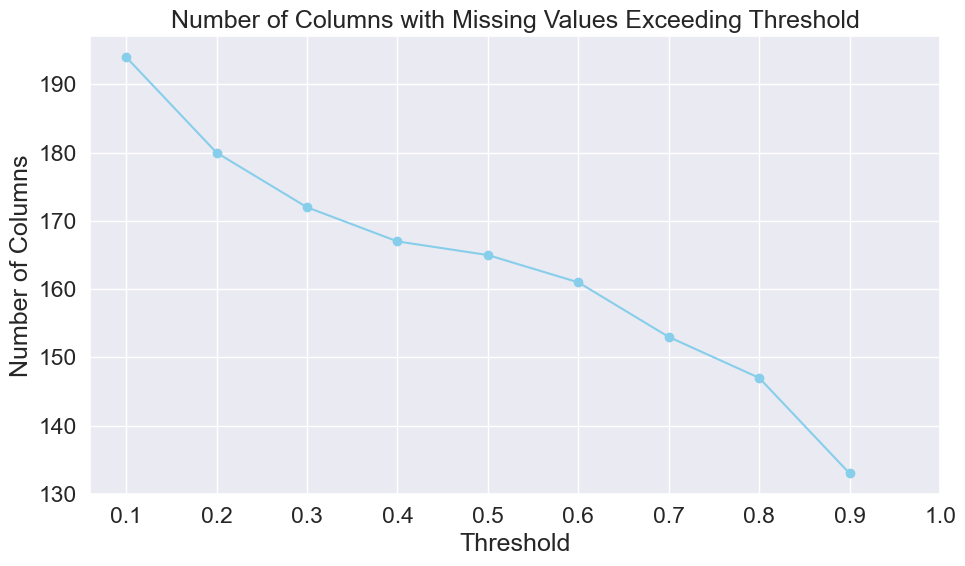

In [172]:
thresholds = np.arange(0.1, 1.0, 0.1)
num_columns_exceeding_threshold = []

for threshold in thresholds:
    columns_with_high_missing = missing_percentage[missing_percentage > threshold * 100]
    num_columns_exceeding_threshold.append(len(columns_with_high_missing))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, num_columns_exceeding_threshold, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Threshold')
plt.ylabel('Number of Columns')
plt.title('Number of Columns with Missing Values Exceeding Threshold')
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()


#### Спочтаку видалю із датасету колонки з біль ніж  90% відсутніх даних, адже вони є абсолютно непоказовими.

In [173]:
threshold = 0.9

missing_percentage = (df.isnull().mean() * 100).round(2)
columns_with_high_missing = missing_percentage[missing_percentage > threshold * 100].index.tolist()

print(f"{len(columns_with_high_missing)} columns with more than {round(threshold * 100)}% missing values")


133 columns with more than 90% missing values


In [174]:
df_preprocessed = df.drop(columns_with_high_missing, axis=1)
df_preprocessed.shape

(26824, 420)

In [175]:
numerical_columns = df_preprocessed.select_dtypes(include=[np.float64]).columns.tolist()
len(numerical_columns)

283

In [176]:
categorical_columns = df_preprocessed.select_dtypes(include=[np.int64]).columns.tolist()
len(categorical_columns) - 1

136

### Numerical Features

In [177]:
df_numerical = df_preprocessed[numerical_columns].copy()
df_numerical.shape

(26824, 283)

In [178]:
def drop_semiconstant(df : pd.DataFrame, treshold : float) -> None:
  '''drop (df.nunique() - 1) / df.count() <= treshold'''

  print(f'Shape before: {df.shape}')

  temp = (df.nunique() - 1) / df.count()
  # print(temp)
    
  features_to_drop = temp[temp <= treshold].index
  # print(features_to_drop)

  df.drop(features_to_drop, axis='columns', inplace=True)

  print(f'Shape after: {df.shape}')

In [179]:
drop_semiconstant(df_numerical, treshold=0.9)

Shape before: (26824, 283)
Shape after: (26824, 15)


### У нас все ще 320 фічей, тому зараз необхідно провести відбір ознак, оскільки виконання Univariate Analysis виявляється досить складним та не зовсім доречним на даному етапі завданням, не згадуючи вже про Bi/Multi-variate analysis.

#### Кореляційний аналіз

In [180]:
def correlation_heatmap(figsize : tuple, df : pd.DataFrame, annot : bool, high_corr_treshold=0.8) -> None:
  corr_feature_groups = get_highly_correlated_feature_groups(df=df,
                                                             treshold=high_corr_treshold)

  fig, ax = plt.subplots(figsize=figsize)

  sns.heatmap(df[corr_feature_groups.index].corr(),
              vmax=1,
              center=0,
              vmin=-1,
              cmap='BrBG',
              annot=annot,
              square=True,
              ax=ax
              )
  fig.show()

def get_highly_correlated_feature_groups(df : pd.DataFrame, treshold : float) -> pd.DataFrame:
  corr_matrix = df.corr()

  grouped_features = corr_matrix[[]].copy()
  grouped_features['group'] = range(1, len(grouped_features) + 1)

  for ii, row in corr_matrix.iterrows():
    corr_features = row[row > treshold].index

    corr_groups = grouped_features.loc[corr_features, 'group'].unique()
    grouped_features.loc[grouped_features['group'].isin(corr_groups), 'group'] = corr_groups.min()

    grouped_features['group'] = grouped_features.rank(method='dense').astype(np.int64)
    grouped_features.sort_values('group', inplace=True)

  return grouped_features    

/var/folders/sr/f6nls20j52vbhpktsv3jr98r0000gn/T/ipykernel_13126/2380313494.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


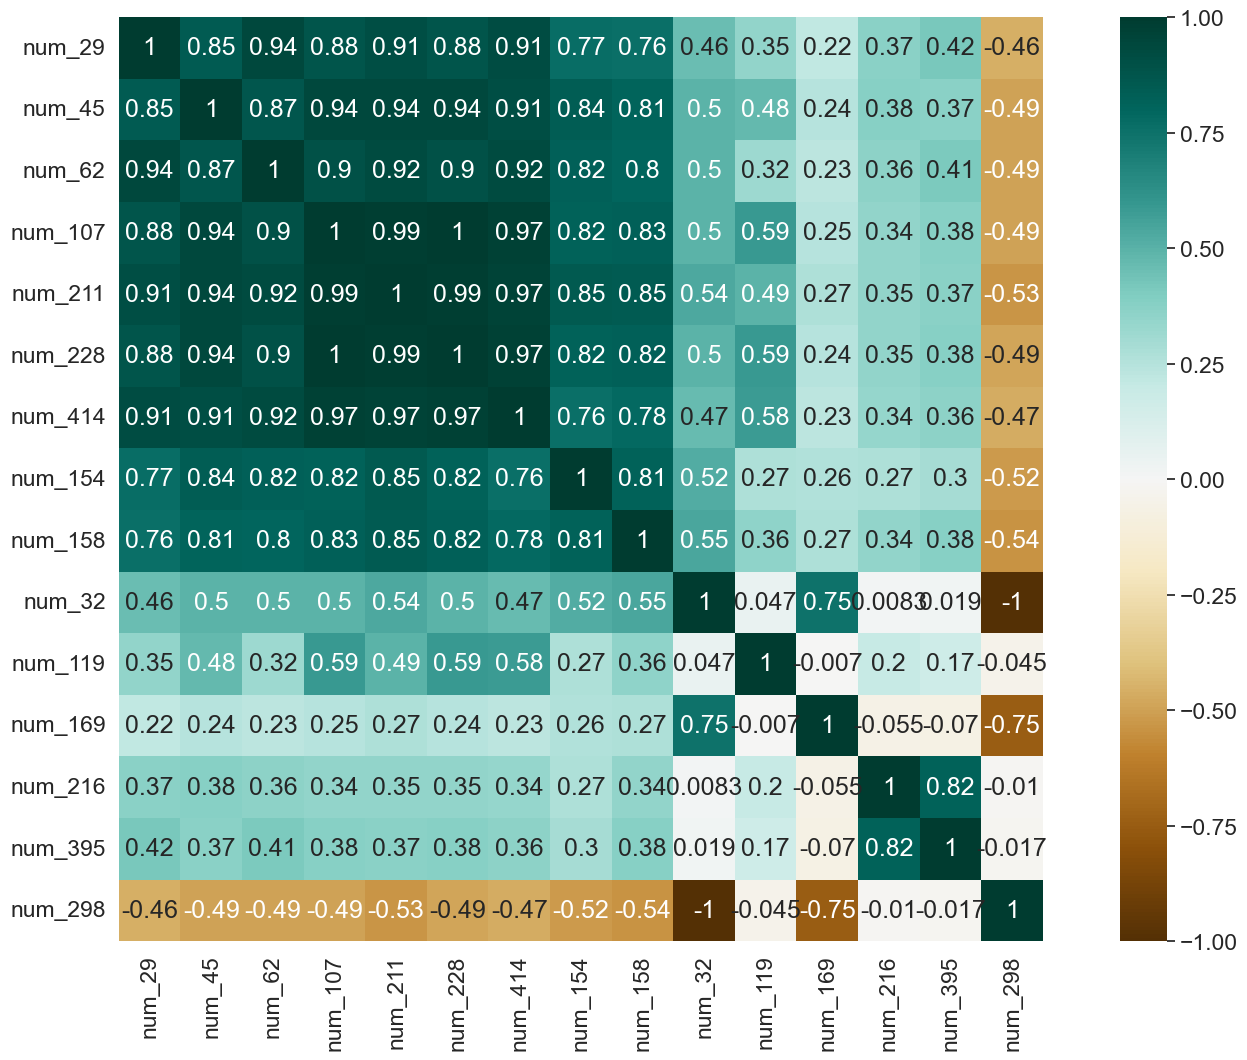

In [181]:
correlation_heatmap((20, 12), df_numerical, True)

#### Важливість признаків

#### Перед виконанням відбору ознак необхідно розібратись із залишившимися відустніми значеннями. 

In [182]:
missing_percentage = (df_numerical.isnull().mean() * 100).round(2)
columns_with_missing = missing_percentage[missing_percentage > 0]
len(columns_with_missing)

15

In [183]:
columns_with_missing

num_29     0.03
num_32     0.03
num_45     0.03
num_62     0.03
num_107    0.03
num_119    0.03
num_154    2.75
num_158    0.03
num_169    0.51
num_211    0.03
num_216    0.03
num_228    0.03
num_298    0.03
num_395    0.04
num_414    0.03
dtype: float64

In [184]:
df_numerical.loc[df_numerical['num_29'].isna()]

num_29  num_32  num_45  num_62  num_107  num_119    num_154  \
Unnamed: 0                                                                
2097           NaN     NaN     NaN     NaN      NaN      NaN   537672.0   
5657           NaN     NaN     NaN     NaN      NaN      NaN   807907.0   
16068          NaN     NaN     NaN     NaN      NaN      NaN   776537.0   
26090          NaN     NaN     NaN     NaN      NaN      NaN   710982.0   
36320          NaN     NaN     NaN     NaN      NaN      NaN  1492376.0   
41559          NaN     NaN     NaN     NaN      NaN      NaN   524545.0   
51841          NaN     NaN     NaN     NaN      NaN      NaN  1088381.0   
59327          NaN     NaN     NaN     NaN      NaN      NaN  1124686.0   

            num_158  num_169  num_211  num_216  num_228  num_298  num_395  \
Unnamed: 0                                                                  
2097            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5657            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
16068           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
26090           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
36320           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
41559           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
51841           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
59327           NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            num_414  
Unnamed: 0           
2097            NaN  
5657            NaN  
16068           NaN  
26090           NaN  
36320           NaN  
41559           NaN  
51841           NaN  
59327           NaN

In [185]:
indexes_with_missing = df_numerical.loc[df_numerical['num_29'].isna()].index.tolist()
indexes_with_missing

[2097, 5657, 16068, 26090, 36320, 41559, 51841, 59327]

In [186]:
df_preprocessed.loc[df_preprocessed['gb'].index.isin(indexes_with_missing)]['gb']

Unnamed: 0
2097     0
5657     0
16068    0
26090    0
36320    0
41559    0
51841    0
59327    0
Name: gb, dtype: int64

#### Бачимо, що у колонках з 0.03% відсутніми значеннями, вони всі відсутні в одному місці, що створює певний патерн. Тим не менш, враховуючи, що я не маю інформації про характер цих признаків та малу кількість таких прикладів, які ще й належать до переважаючого класу, просто приберу їх з нашого датасету.

In [187]:
df_numerical.columns

Index(['num_29', 'num_32', 'num_45', 'num_62', 'num_107', 'num_119', 'num_154',
       'num_158', 'num_169', 'num_211', 'num_216', 'num_228', 'num_298',
       'num_395', 'num_414'],
      dtype='object')

In [188]:
df_numerical = df_numerical.drop(axis=0, index=indexes_with_missing)
df_numerical.shape

(26816, 15)

In [189]:
missing_percentage = (df_numerical.isnull().mean() * 100).round(2)
columns_with_missing = missing_percentage[missing_percentage > 0]
len(columns_with_missing)

3

In [190]:
columns_with_missing

num_154    2.75
num_169    0.48
num_395    0.01
dtype: float64

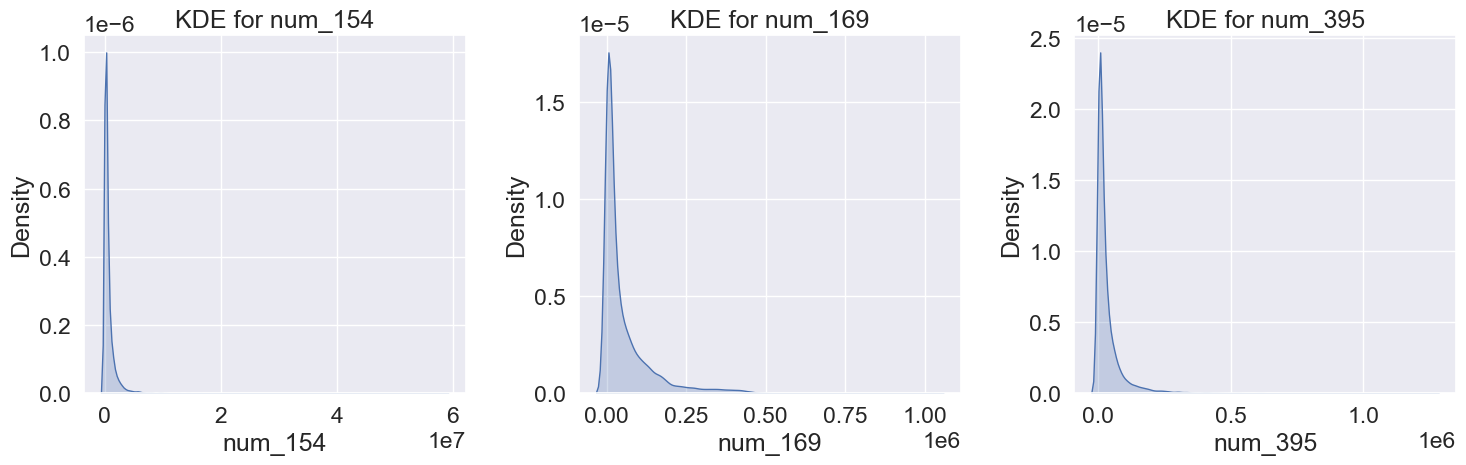

In [191]:
num_cols = len(columns_with_missing.index)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 5))

for i, col in enumerate(columns_with_missing.index):
    sns.kdeplot(df_numerical[col], fill=True, ax=axes[i % 4])
    axes[i % num_cols].set_title(f'KDE for {col}')
    axes[i % num_cols].set_xlabel(col)
    axes[i % num_cols].set_ylabel('Density')

plt.tight_layout()
plt.show()


#### Відсутні значення, що залишились замінимо медіаною, бо їх розподіли є "skewed", та такий метод не внесе значного спотворення загальної структури даних.

In [192]:
feature_names = columns_with_missing.index

imputer = SimpleImputer(strategy='median')
df_numerical[feature_names] = imputer.fit_transform(df_numerical[feature_names])

In [193]:
df_numerical.isna().sum().sum()

0

In [194]:
def feature_importance(features:pd.DataFrame, target:pd.Series, estimator, estimator_title:str, figsize:tuple, plot:bool = False) -> pd.DataFrame:
  # Mutual Information
  mutual_info = pd.Series(mutual_info_classif(features, target), name='mutual_info')
  mutual_info.index = features.columns
  mutual_info.sort_values(ascending=False, inplace=True)


  # Model
  estimator.fit(features, target)

  model_importances = estimator.feature_importances_
  model_importances = pd.Series(model_importances, index=features.columns, name='model_importance').sort_values(ascending=False)


  # General
  importances = pd.concat([mutual_info, model_importances], axis=1)

  # mutual_info = (importances['mutual_info'] - importances['mutual_info'].min()) / importances['mutual_info'].max()
  # forest_importance = (importances['forest_importance'] - importances['forest_importance'].min()) / importances['forest_importance'].max()
  # importances['overall_score'] = (mutual_info + forest_importance) / 2
  importances['overall_score'] = (2 * importances['mutual_info'] * importances['model_importance']) / (importances['mutual_info'] + importances['model_importance'])


  
  if plot == True :  
      # Plot
      # sns.set(font_scale=0.5)
      fig, axs = plt.subplots(3, 1, figsize=figsize, constrained_layout=True)
      axs = axs.flatten()
    
      sns.barplot(x=importances['mutual_info'].sort_values(ascending=False), y=importances.index, ax=axs[0])
      axs[0].set_title('Mutual Information')
    
      sns.barplot(x=importances['model_importance'].sort_values(ascending=False), y=importances.index, ax=axs[1])
      axs[1].set_title(estimator_title)
    
      sns.barplot(x=importances['overall_score'].sort_values(ascending=False), y=importances.index, ax=axs[2])
      axs[2].set_title('Overal Score')
    
      # importances['mutual_info'].sort_values(ascending=False).plot.bar(ax=axs[0], title='Mutual Information')
      # importances['model_importance'].sort_values(ascending=False).plot.bar(ax=axs[1], title=estimator_title)
      # importances['overall_score'].sort_values(ascending=False).plot.bar(ax=axs[2], title='Overal Score')
      fig.show()

  return importances.sort_values(by='overall_score', ascending=False)

In [195]:
df_target_numeric = df_preprocessed.loc[df_preprocessed.index.isin(df_numerical.index)]['gb']
df_target_numeric.shape

(26816,)

/var/folders/sr/f6nls20j52vbhpktsv3jr98r0000gn/T/ipykernel_13126/1226896126.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


mutual_info  model_importance  overall_score
num_169     0.007775          0.083300       0.014222
num_395     0.006728          0.076731       0.012372
num_216     0.006234          0.076421       0.011527
num_29      0.004101          0.062106       0.007694
num_119     0.002875          0.082738       0.005558
num_298     0.002862          0.063254       0.005476
num_32      0.002723          0.059281       0.005206
num_62      0.002186          0.061042       0.004220
num_107     0.001987          0.057646       0.003842
num_158     0.001555          0.074053       0.003045
num_45      0.001239          0.063017       0.002431
num_414     0.000805          0.064245       0.001591
num_154     0.000373          0.055918       0.000741
num_211     0.000000          0.059762       0.000000
num_228     0.000000          0.060486       0.000000

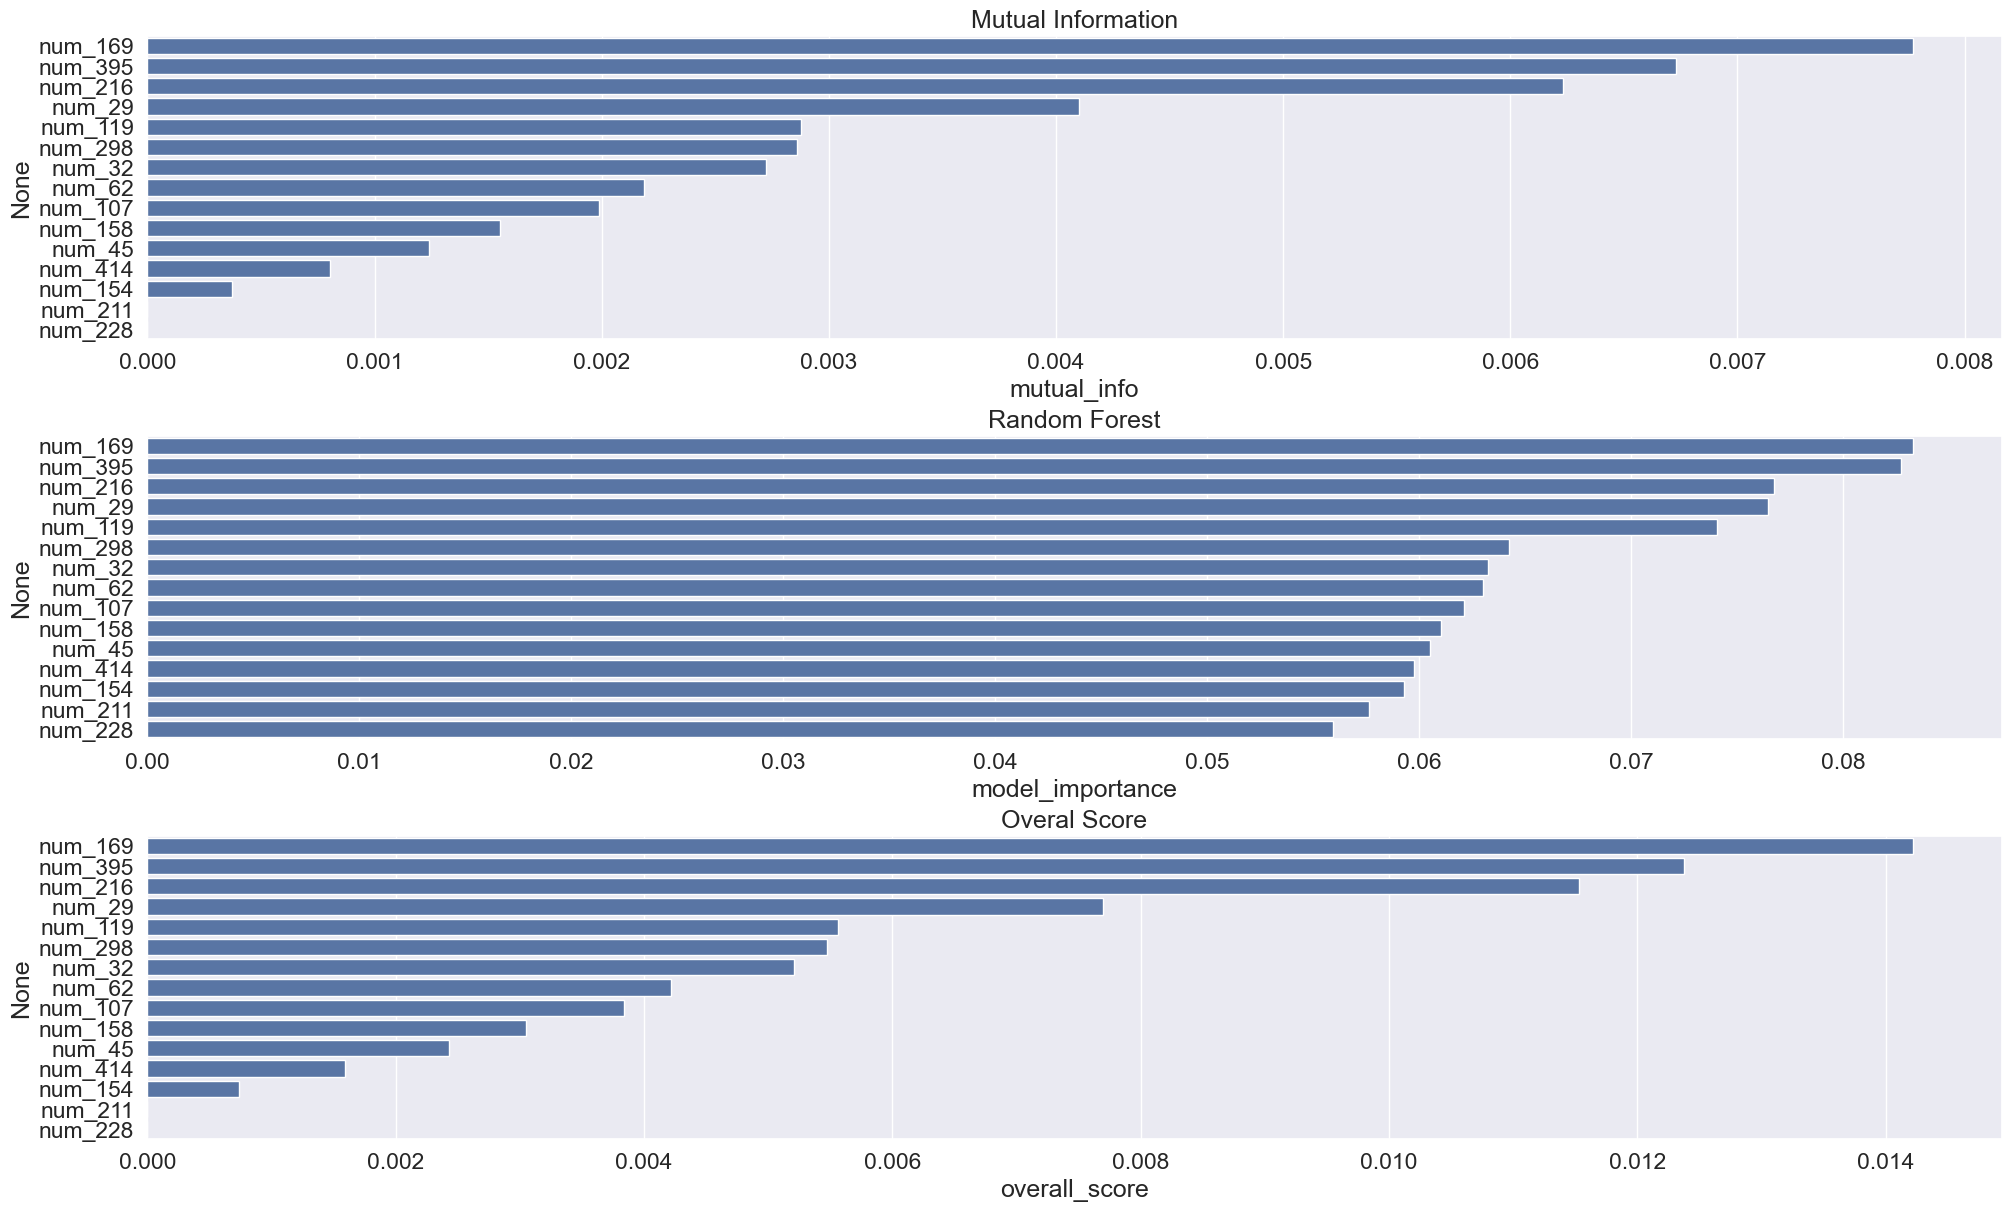

In [196]:
rf_model = RandomForestClassifier()

feature_importance(df_numerical, df_target_numeric, rf_model, 'Random Forest', (20, 12), plot=True)

In [197]:
def get_best_uncorr_features(
    features:pd.DataFrame,
    target:pd.Series,
    estimator,
    estimator_title : str,
    score : str,
    score_treshold : float,
    high_corr_treshold : float,
    figsize : tuple
) -> np.ndarray:
  """
  score in ['mutual_info', 'forest_importance', 'overall_score'],
  where 'overall_score' = mean(min-max normalized 'mutual_info' and 'forest_importance)'
  """

  corr_matrix = features.corr()
  importances = feature_importance(features=features,
                                   target=target,
                                   estimator=estimator,
                                   estimator_title=estimator_title,
                                   figsize=figsize,
                                   plot=False
                                   )

  importances.sort_values(by=score, ascending=False, inplace=True)
  output = [importances.index[0]]

  for feature in importances[importances[score].abs() >= score_treshold].index:
    if (corr_matrix.loc[feature, output].abs() < high_corr_treshold).all():
      output.append(feature)

  return np.array(output)

In [198]:
df_numerical.columns

Index(['num_29', 'num_32', 'num_45', 'num_62', 'num_107', 'num_119', 'num_154',
       'num_158', 'num_169', 'num_211', 'num_216', 'num_228', 'num_298',
       'num_395', 'num_414'],
      dtype='object')

In [199]:
df_numerical

num_29      num_32       num_45       num_62      num_107  \
Unnamed: 0                                                                   
0           18598389.68  7768369.20  11306764.14  26672630.02  28333733.29   
1             963054.61    41999.36    422913.14    974642.21    921779.91   
4              71843.00   112589.52     81476.86         0.00    176490.80   
5             237787.00    48983.65    119534.17    277608.00    307216.11   
6            1665741.11   779486.22   1292247.39   2192372.00   7671415.89   
...                 ...         ...          ...          ...          ...   
61104         698800.00    36157.12    342375.59    738801.00    975317.87   
61105         224719.74    24076.08    150783.01    276854.94    572621.73   
61108        1588435.74  1350208.71  17137955.34  17009553.20  28391614.65   
61110        6831275.60  3083510.36   3650601.42   6823940.60   7441945.93   
61111        4832346.92   184601.81   3559405.37   3832423.92   8664194.25   

               num_119    num_154      num_158    num_169     num_211  \
Unnamed: 0                                                              
0           2544058.39  3836906.0  27276369.89  377973.06  4694287.90   
1            158062.81   142472.0    279426.28    1410.33   163857.03   
4              5183.07    18440.0    150412.34   12156.37    29390.00   
5            109335.32    42092.0    165541.67    2224.14    49735.46   
6           5064200.58   114630.0   2469064.87   27896.32   890391.86   
...                ...        ...          ...        ...         ...   
61104        159050.04    23250.0    747785.45     710.00   161316.83   
61105        347079.90    36676.0    144860.97     350.52    75521.34   
61108       5869403.31  3507947.0  15455195.30   37228.78  3081589.34   
61110         13105.43   225754.0   7340792.24  118279.54  1207212.60   
61111       1742451.40   278838.0   3188437.05   21710.18  1019637.13   

              num_216      num_228     num_298    num_395      num_414  
Unnamed: 0                                                              
0            10214.74  28344782.47 -7783775.80    4743.92  28162496.65  
1             7058.93    988142.21   -41999.36    6419.05    989383.82  
4               46.98    176340.03  -112154.12      74.09     87444.51  
5             1310.65    298412.80   -43685.58    5859.27    297608.00  
6             8634.85   6733855.70  -777940.94    3161.35   6614247.89  
...               ...          ...         ...        ...          ...  
61104        43095.40    967901.00   -36157.12   32993.16    840801.82  
61105         4703.38    557728.07   -15888.73    2291.57    557554.94  
61108       101808.34  27824618.73 -1058370.91  151475.43  17821295.19  
61110        14250.34   7243275.60 -2893629.69   22353.44   7228675.60  
61111        43220.74   8742870.92  -184601.81  123539.25   5277923.92  

[26816 rows x 15 columns]

In [201]:
df_numerical

num_29      num_32       num_45       num_62      num_107  \
Unnamed: 0                                                                   
0           18598389.68  7768369.20  11306764.14  26672630.02  28333733.29   
1             963054.61    41999.36    422913.14    974642.21    921779.91   
4              71843.00   112589.52     81476.86         0.00    176490.80   
5             237787.00    48983.65    119534.17    277608.00    307216.11   
6            1665741.11   779486.22   1292247.39   2192372.00   7671415.89   
...                 ...         ...          ...          ...          ...   
61104         698800.00    36157.12    342375.59    738801.00    975317.87   
61105         224719.74    24076.08    150783.01    276854.94    572621.73   
61108        1588435.74  1350208.71  17137955.34  17009553.20  28391614.65   
61110        6831275.60  3083510.36   3650601.42   6823940.60   7441945.93   
61111        4832346.92   184601.81   3559405.37   3832423.92   8664194.25   

               num_119    num_154      num_158    num_169     num_211  \
Unnamed: 0                                                              
0           2544058.39  3836906.0  27276369.89  377973.06  4694287.90   
1            158062.81   142472.0    279426.28    1410.33   163857.03   
4              5183.07    18440.0    150412.34   12156.37    29390.00   
5            109335.32    42092.0    165541.67    2224.14    49735.46   
6           5064200.58   114630.0   2469064.87   27896.32   890391.86   
...                ...        ...          ...        ...         ...   
61104        159050.04    23250.0    747785.45     710.00   161316.83   
61105        347079.90    36676.0    144860.97     350.52    75521.34   
61108       5869403.31  3507947.0  15455195.30   37228.78  3081589.34   
61110         13105.43   225754.0   7340792.24  118279.54  1207212.60   
61111       1742451.40   278838.0   3188437.05   21710.18  1019637.13   

              num_216      num_228     num_298    num_395      num_414  
Unnamed: 0                                                              
0            10214.74  28344782.47 -7783775.80    4743.92  28162496.65  
1             7058.93    988142.21   -41999.36    6419.05    989383.82  
4               46.98    176340.03  -112154.12      74.09     87444.51  
5             1310.65    298412.80   -43685.58    5859.27    297608.00  
6             8634.85   6733855.70  -777940.94    3161.35   6614247.89  
...               ...          ...         ...        ...          ...  
61104        43095.40    967901.00   -36157.12   32993.16    840801.82  
61105         4703.38    557728.07   -15888.73    2291.57    557554.94  
61108       101808.34  27824618.73 -1058370.91  151475.43  17821295.19  
61110        14250.34   7243275.60 -2893629.69   22353.44   7228675.60  
61111        43220.74   8742870.92  -184601.81  123539.25   5277923.92  

[26816 rows x 15 columns]

In [212]:
best_uncorr_features = get_best_uncorr_features(
    features=df_numerical,
    target=df_target_numeric,
    score='overall_score',
    score_treshold=0.01,
    high_corr_treshold=0.8,

    estimator_title='RandomForest',
    estimator=RandomForestClassifier(
        # n_estimators=1000,
        # max_depth=5,
        # bootstrap=True,
        # n_jobs=4,
        # random_state=42
    ),
    figsize=(15, 30)
).tolist()

In [213]:
best_uncorr_features

['num_169', 'num_216']

In [214]:
df_numerical = df_numerical[best_uncorr_features].copy()
df_numerical.head()

num_169   num_216
Unnamed: 0                     
0           377973.06  10214.74
1             1410.33   7058.93
4            12156.37     46.98
5             2224.14   1310.65
6            27896.32   8634.85

In [215]:
df_target_numeric

Unnamed: 0
0        0
1        0
4        0
5        0
6        0
        ..
61104    0
61105    0
61108    0
61110    0
61111    0
Name: gb, Length: 26816, dtype: int64

### Categorical Features

In [216]:
categorical_columns.remove('gb')

In [217]:
df_categorical = df_preprocessed[categorical_columns].copy()
df_categorical.shape

(26824, 136)

In [218]:
df_target_categorical = df_preprocessed['gb'].copy()

In [219]:
importances = feature_importance(df_categorical, df_target_categorical, rf_model, 'Random Forest', (50, 28))

In [220]:
importances

mutual_info  model_importance  overall_score
id         0.079553          0.076516       0.078005
cat_60     0.036516          0.063806       0.046450
cat_98     0.018679          0.049475       0.027120
cat_38     0.015465          0.050543       0.023684
cat_19     0.012638          0.025900       0.016987
...             ...               ...            ...
cat_1      0.005672          0.000000       0.000000
cat_7      0.004596          0.000000       0.000000
cat_42     0.005564          0.000000       0.000000
cat_51     0.005537          0.000000       0.000000
cat_53     0.004127          0.000000       0.000000

[136 rows x 3 columns]

#### Final dataset

In [221]:
def make_df(categorical_features: pd.DataFrame, numerical_features:pd.DataFrame, target:pd.Series,
            numeric_score_limit:float, high_corr_limit:float, categorical_score_limit:float) -> pd.DataFrame:

    best_categorical_features = categorical_features.loc[categorical_features['overall_score'] > categorical_score_limit].index.tolist()
    # print(best_cat_features)
    
    
    best_numeric_features = get_best_uncorr_features(
        features=numerical_features,
        target=target,
        score='overall_score',
        score_treshold=numeric_score_limit,
        high_corr_treshold=high_corr_limit,
    
        estimator_title='RandomForest',
        estimator=RandomForestClassifier(
            # n_estimators=1000,
            # max_depth=5,
            # bootstrap=True,
            # n_jobs=4,
            # random_state=42
        ),
        figsize=(15, 30)
    ).tolist()
    # print(best_numeric_features)
    
    df_numeric = numerical_features[best_numeric_features].copy().join(target)    
    df_category = df_preprocessed[best_categorical_features].copy()
    
    df_final = df_numeric.join(df_category)
    

    return df_final            


In [222]:
processed_df = make_df(importances, df_numerical, df_target_numeric, 0.01, 0.8, 0.01)
processed_df

num_169    num_216  gb    id  cat_60  cat_98  cat_38  cat_19  \
Unnamed: 0                                                                   
0           377973.06   10214.74   0     1       1       1       1       1   
1             1410.33    7058.93   0     2       2       2       2       2   
4            12156.37      46.98   0     3       3       3       3       3   
5             2224.14    1310.65   0     4       4       1       4       4   
6            27896.32    8634.85   0     5       3       4       5       5   
...               ...        ...  ..   ...     ...     ...     ...     ...   
61104          710.00   43095.40   0  5242    1313      17      77       2   
61105          350.52    4703.38   0  4320     915     872     172       2   
61108        37228.78  101808.34   0  2516     914     807      45      89   
61110       118279.54   14250.34   0  4610     423      17      35       2   
61111        21710.18   43220.74   0  5243     252    1143      89       2   

            cat_68  
Unnamed: 0          
0                1  
1                2  
4                2  
5                2  
6                2  
...            ...  
61104            2  
61105            2  
61108            2  
61110            2  
61111            2  

[26816 rows x 9 columns]

In [223]:
df_train = processed_df.drop('gb', axis=1)
df_target = processed_df['gb']

### Тепер спробуємо використати наші фічі для пердікту, попередньо додавши методи овер/андер-семплінгу

In [224]:
x_train, x_test, y_train, y_test = train_test_split(df_train, df_target, test_size=0.2,
                                                    stratify=df_target, random_state=42)

In [225]:
def undersampling(df:pd.DataFrame, target:pd.Series, frac:np.float64) -> pd.DataFrame:

    df_balanced = df.join(target)
    
    df_major = df_balanced.loc[df_balanced['gb'] == 0]
    df_minor = df_balanced.loc[df_balanced['gb'] == 1]
    
    print(f'major shape = {df_major.shape}')
    print(f'minor shape = {df_minor.shape}')

    df_major_sample = df_major.sample(frac=0.025)
    print(f'major class sample shape = {df_major_sample.shape}')

    df_resampled = pd.concat([df_minor, df_major_sample])
    
    return df_resampled
    

In [226]:
undersampled_df = undersampling(x_train, y_train, 0.025)
undersampled_df.shape

major shape = (20978, 9)
minor shape = (474, 9)
major class sample shape = (524, 9)


(998, 9)

In [227]:
df_undersampled_train = undersampled_df.drop('gb', axis=1)
df_undersampled_target = undersampled_df['gb']

In [228]:
desired_minority_ratio = 0.2
class_ratio = 0.7  

categorical_columns = x_train.select_dtypes(include=[np.int64]).columns.tolist()

pipeline = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy=desired_minority_ratio)),
    ('over', SMOTENC(sampling_strategy=class_ratio ,categorical_features=categorical_columns, random_state=42))
])

X_resampled, y_resampled = pipeline.fit_resample(x_train, y_train)



In [229]:
y_resampled.value_counts()

gb
0    2370
1    1659
Name: count, dtype: int64

# **Modeling**

In [230]:
rf = RandomForestClassifier()
adaboost = AdaBoostClassifier()
gboost = GradientBoostingClassifier()
xgb = XGBClassifier()
svm = SVC()
mlp = MLPClassifier()


models = [rf, adaboost, gboost, xgb, svm, mlp]

In [231]:
def model_selection(models:list, features_train:pd.DataFrame, features_test:pd.DataFrame,
                    target_train:pd.Series, target_test:pd.Series)-> None:
    
    scaler = StandardScaler()

    for model in models:
        
        if model in ('svm', 'mlp'):
            features_train = scaler.fit_transform(features_train)
            features_test = scaler.transform(features_test)
        
    
        model.fit(features_train, target_train)
    
        model_evaluation(model, features_train, features_test, target_train, target_test, f'{model}')
        precision_recall_display(model, features_train, features_test, target_train, target_test)



#### No smote:

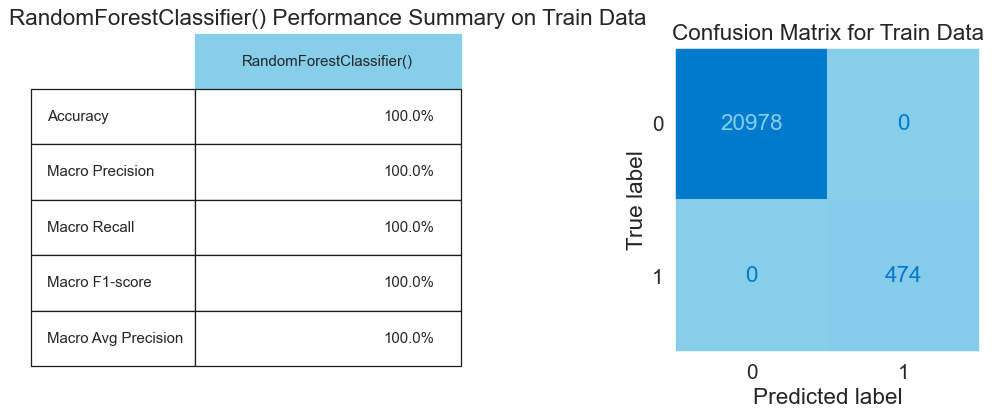

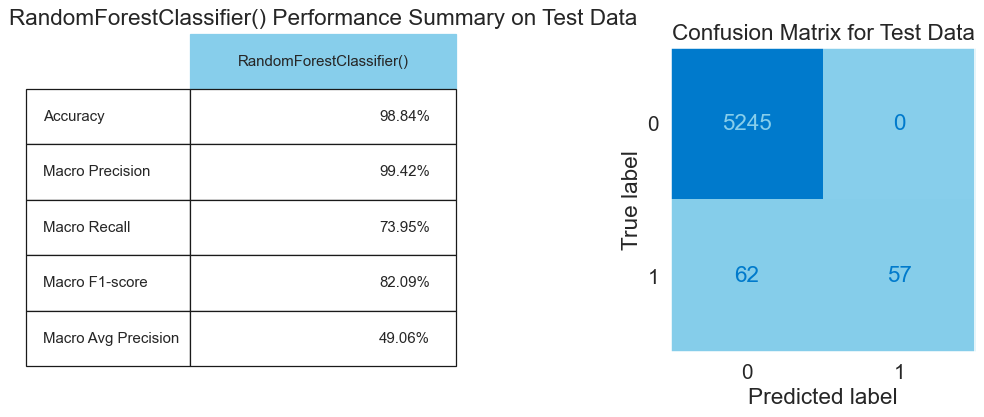

/Users/ivanbashtovyi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


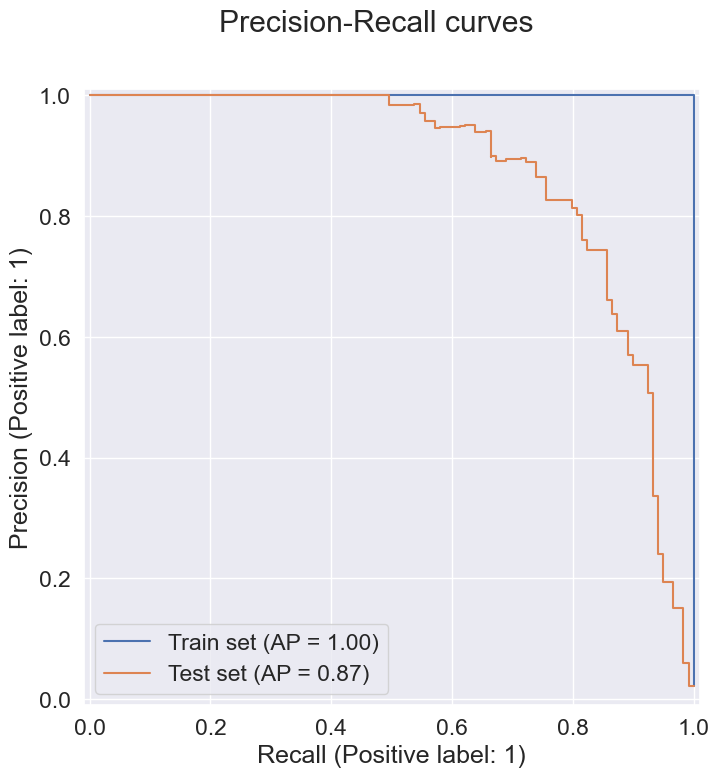

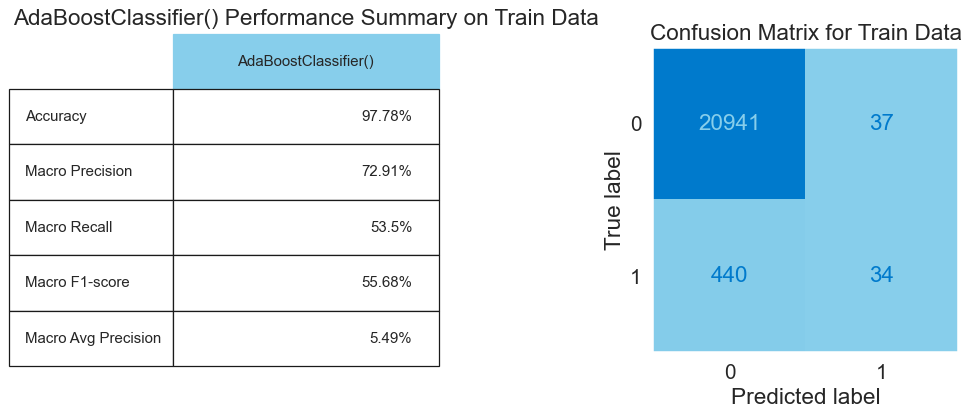

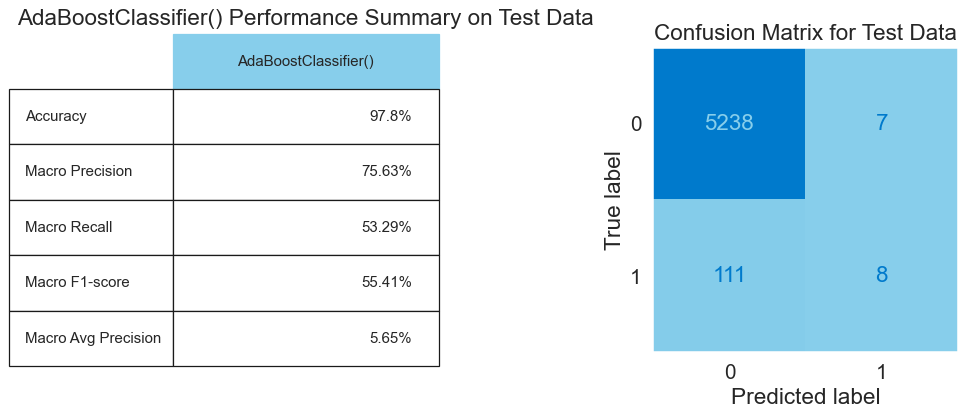

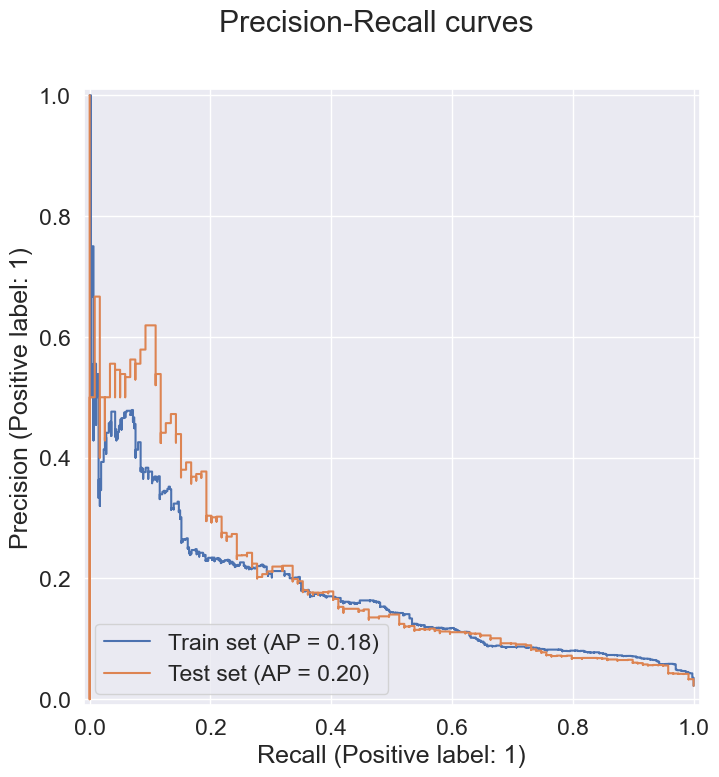

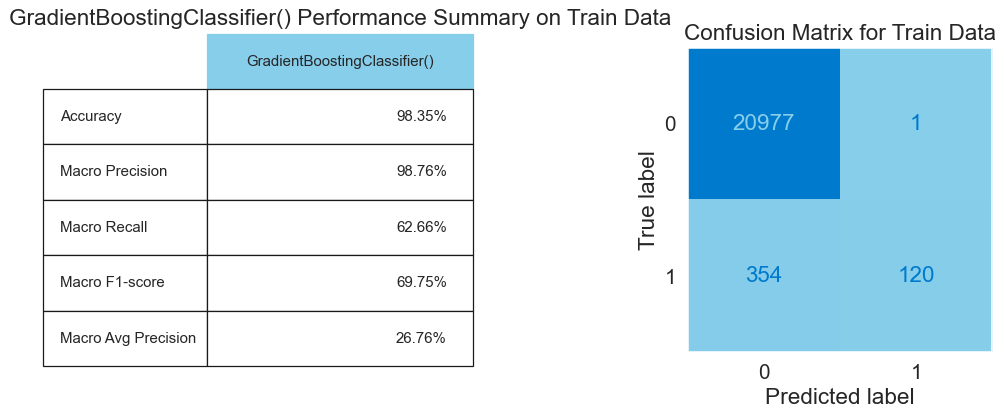

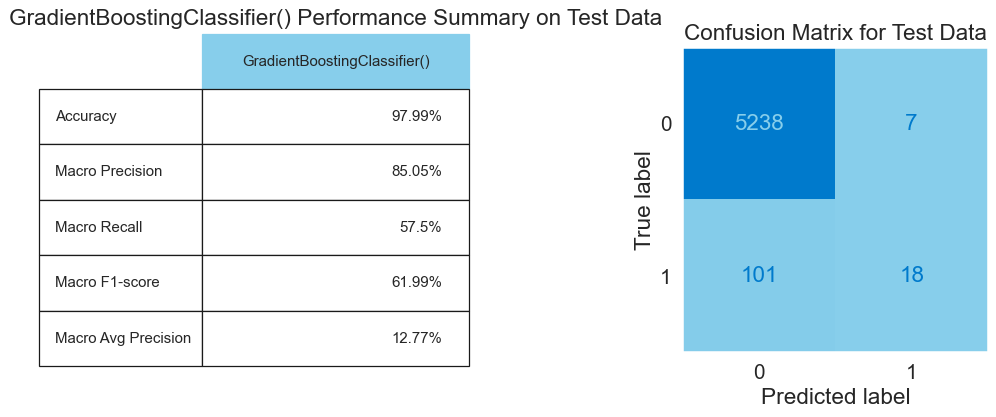

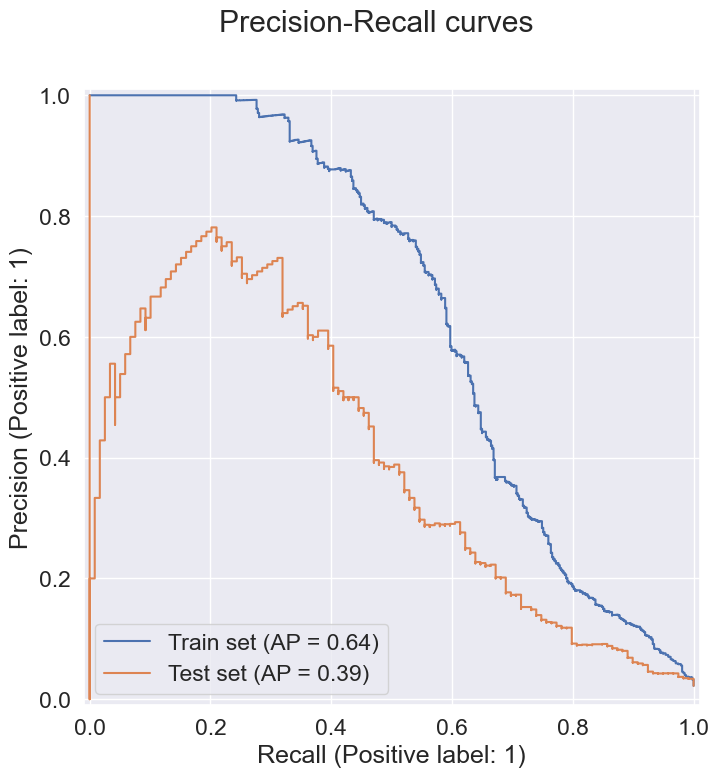

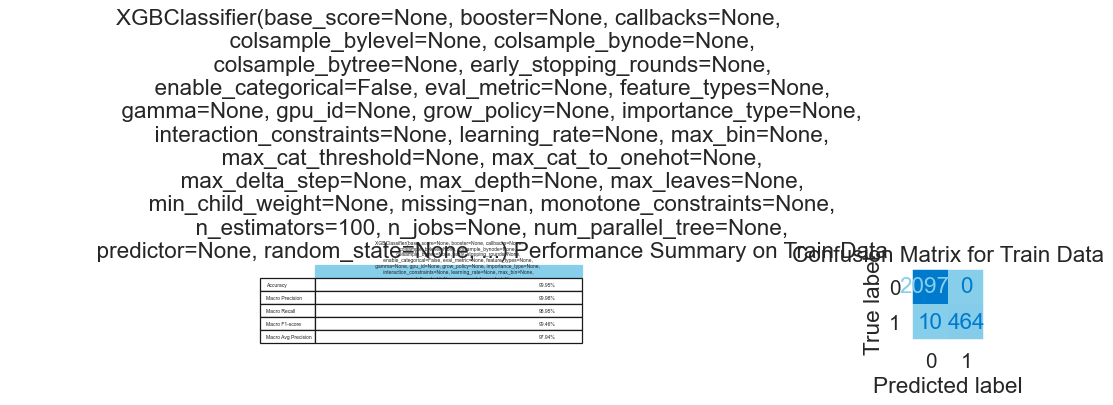

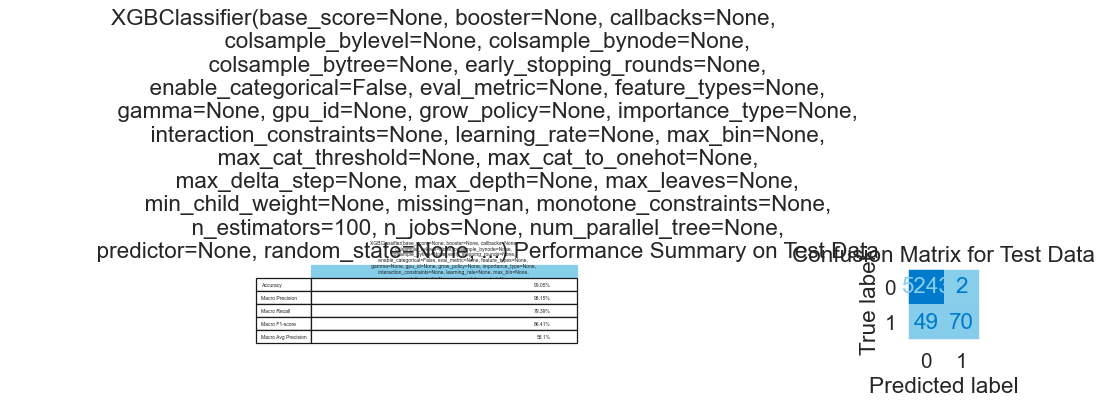

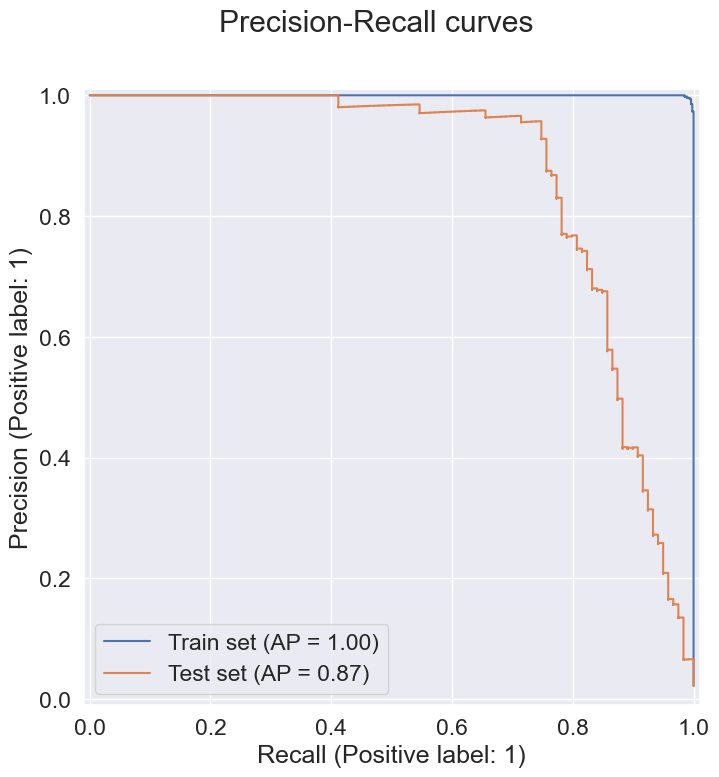

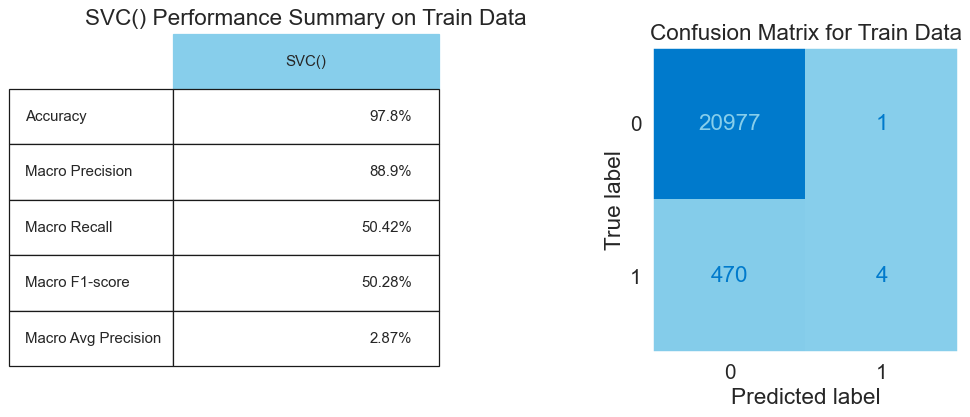

/Users/ivanbashtovyi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


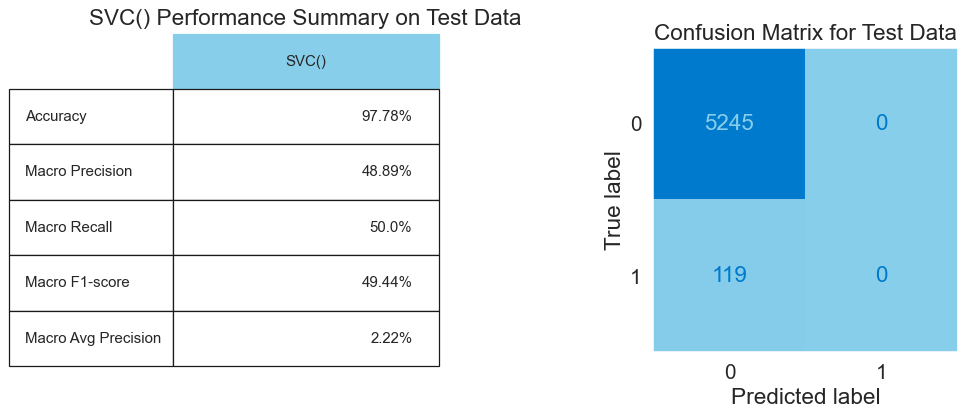

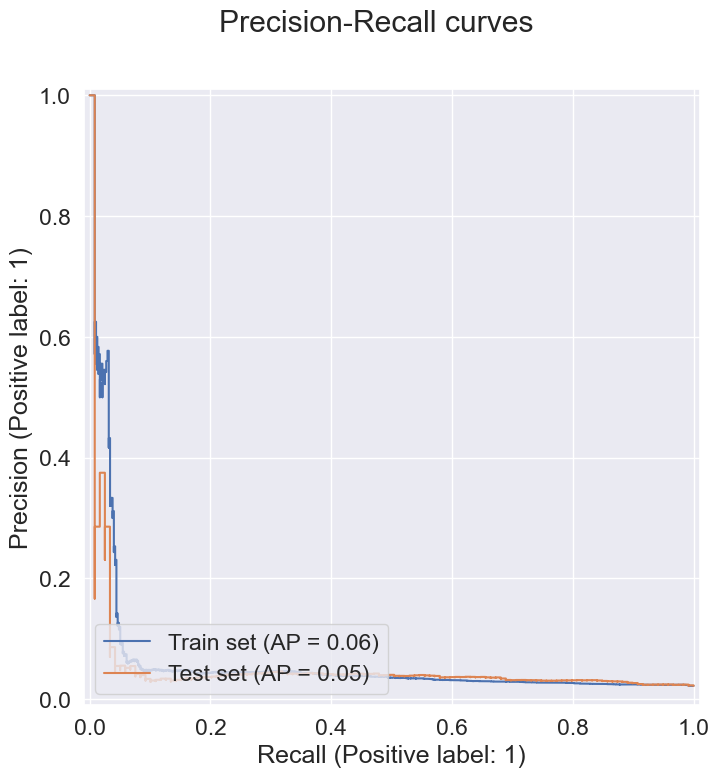

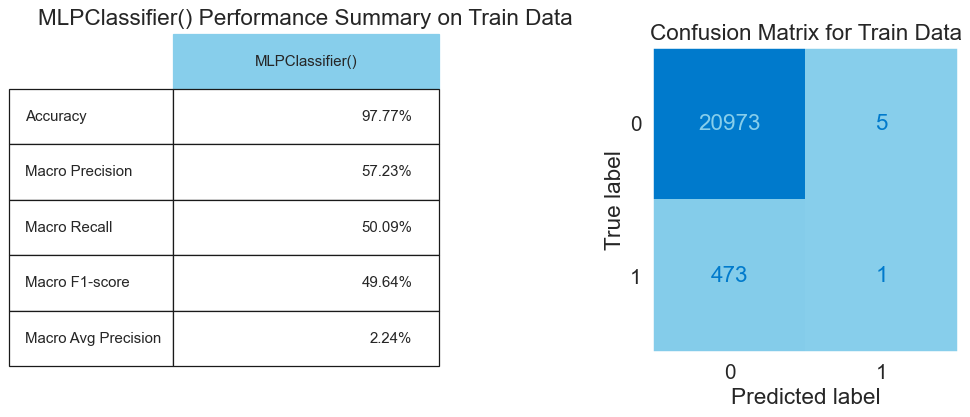

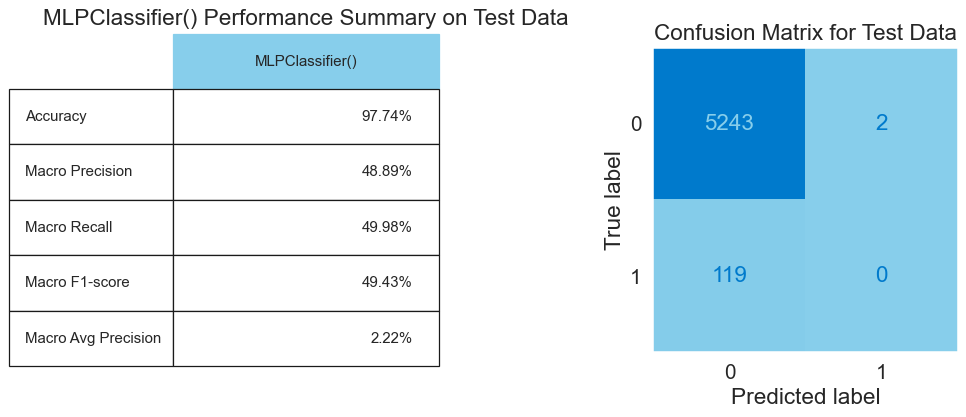

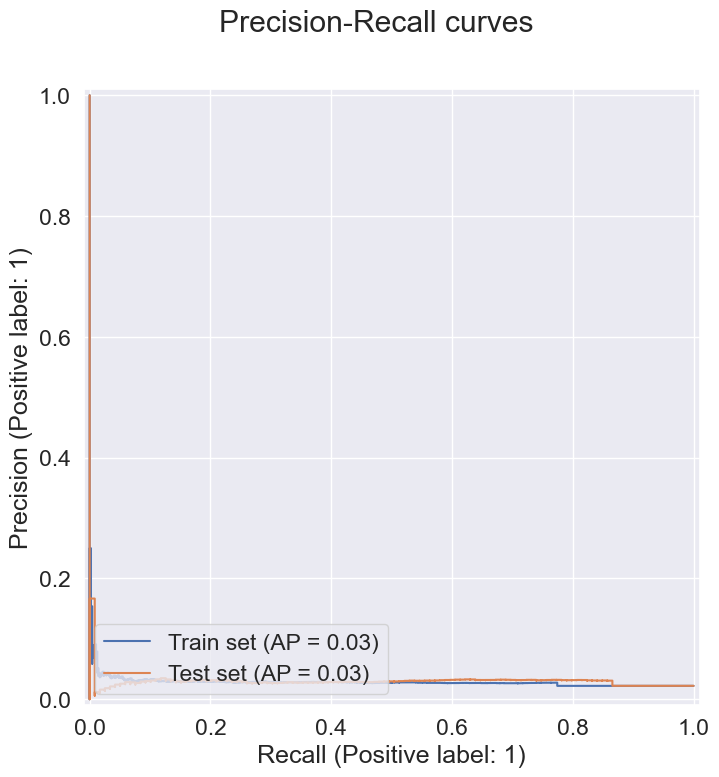

In [232]:
model_selection(models, x_train, x_test, y_train, y_test)

#### With smote:

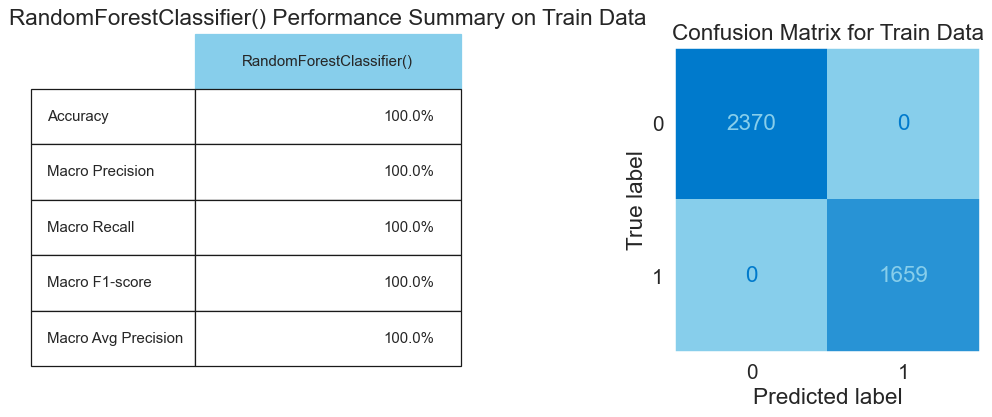

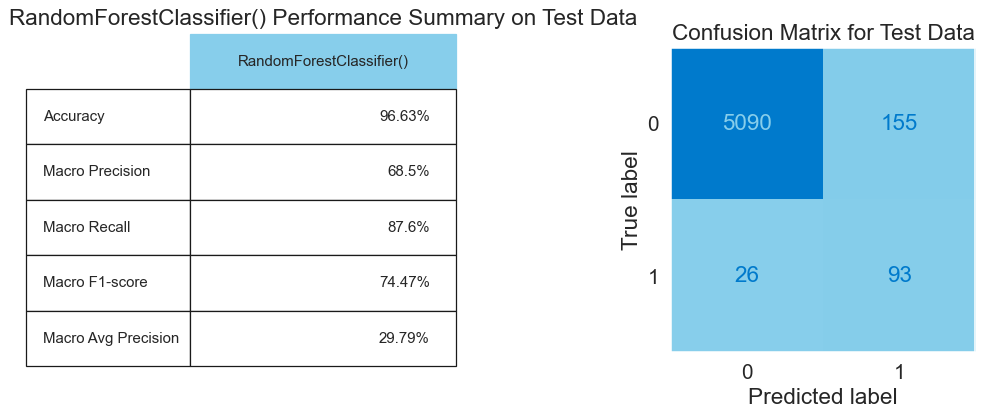

/Users/ivanbashtovyi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


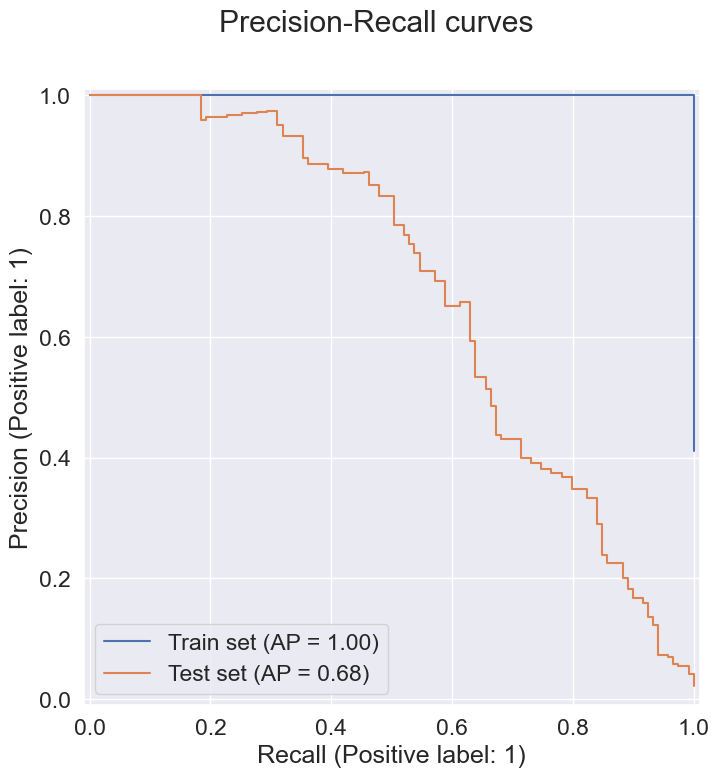

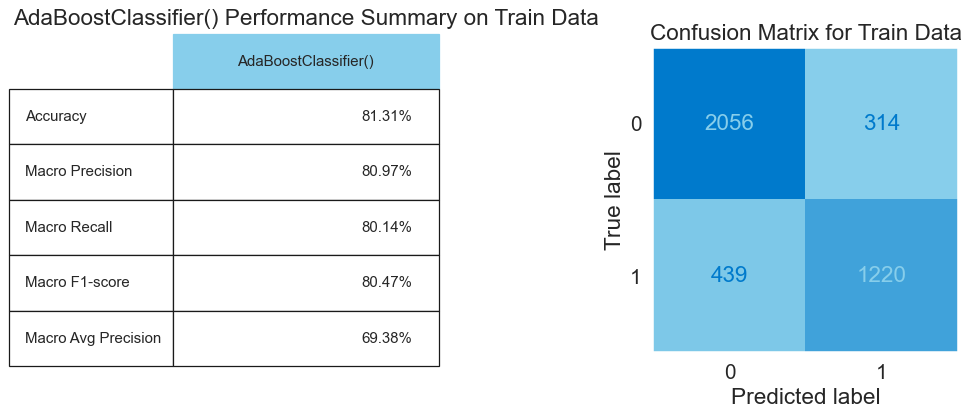

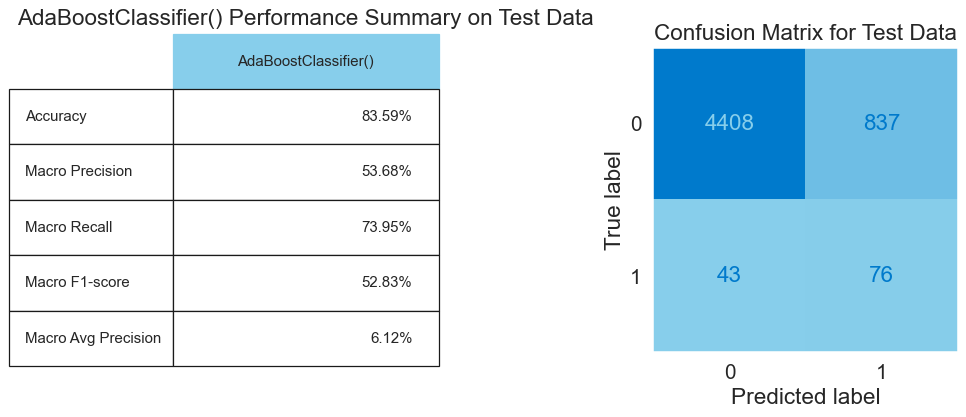

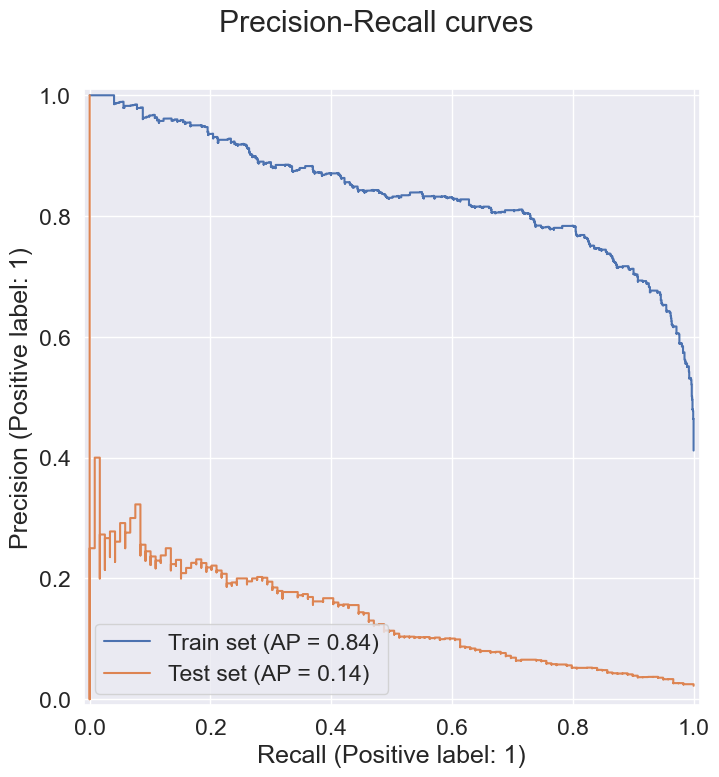

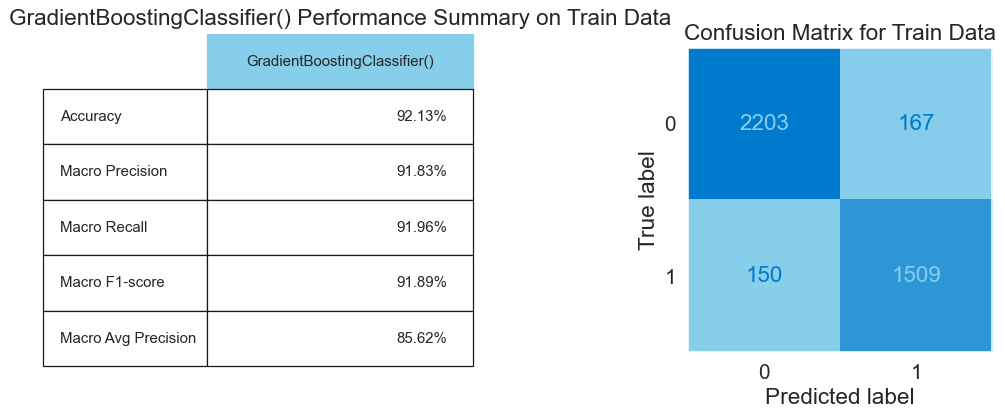

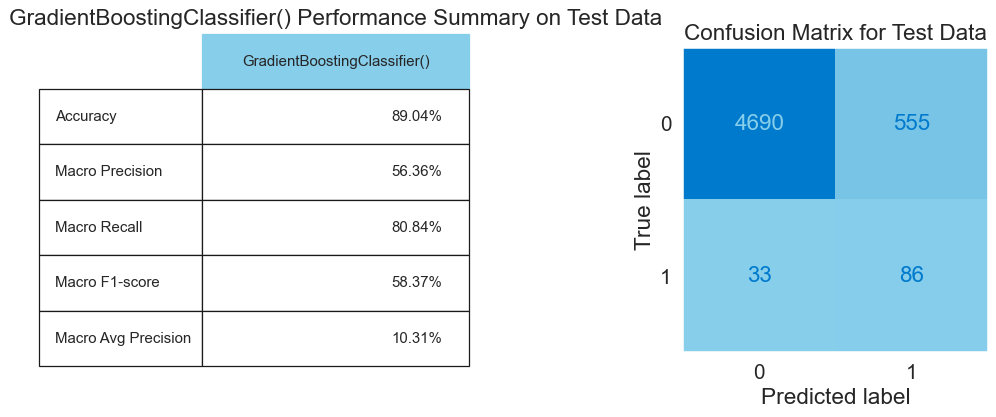

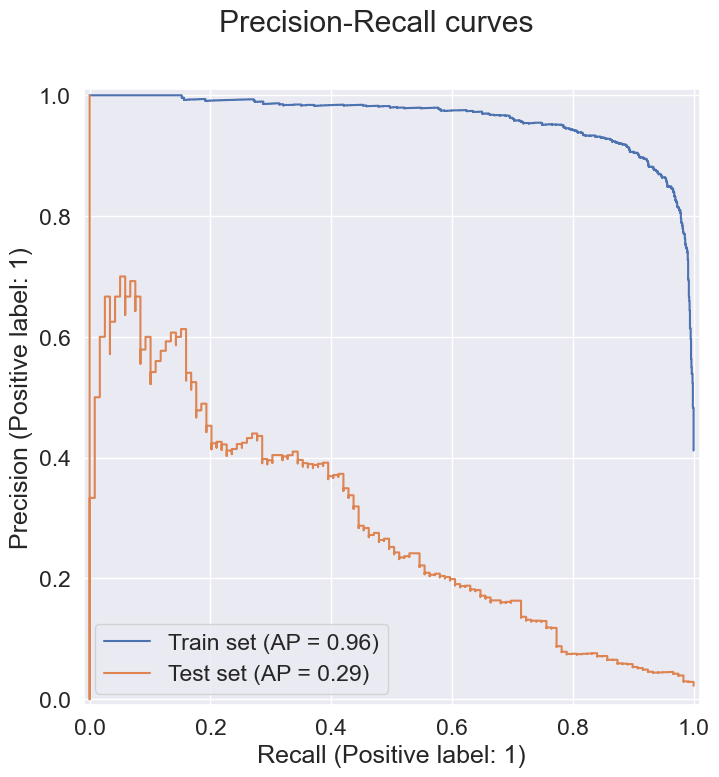

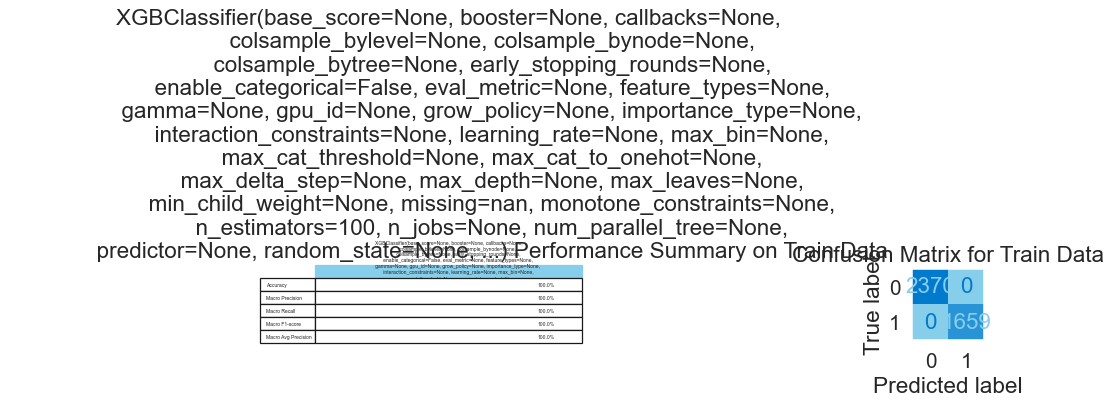

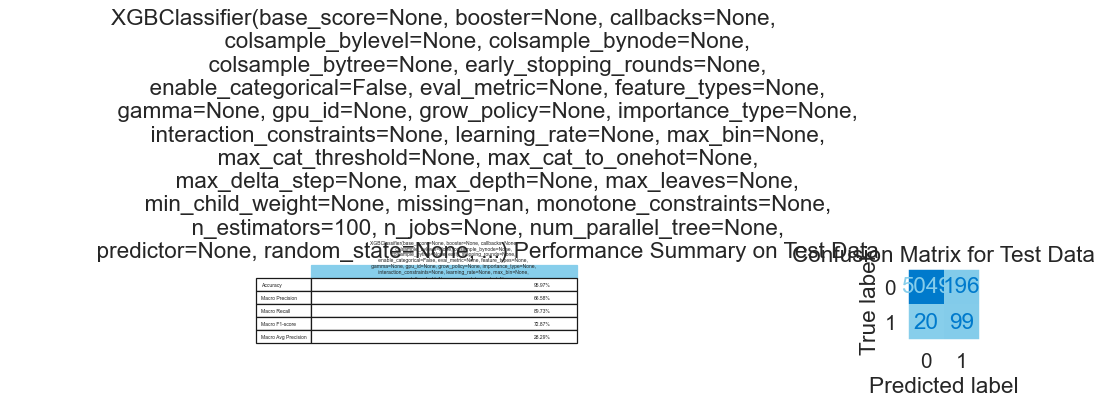

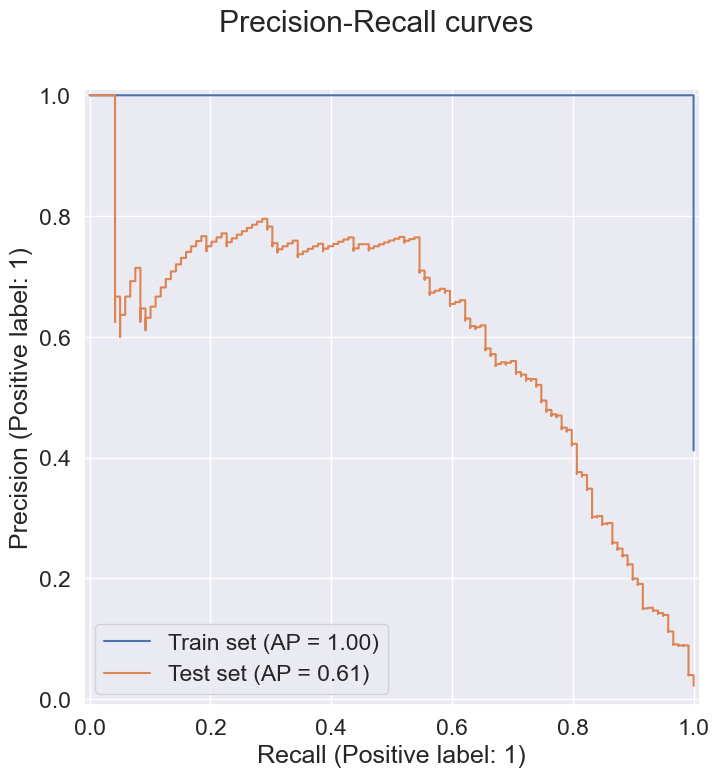

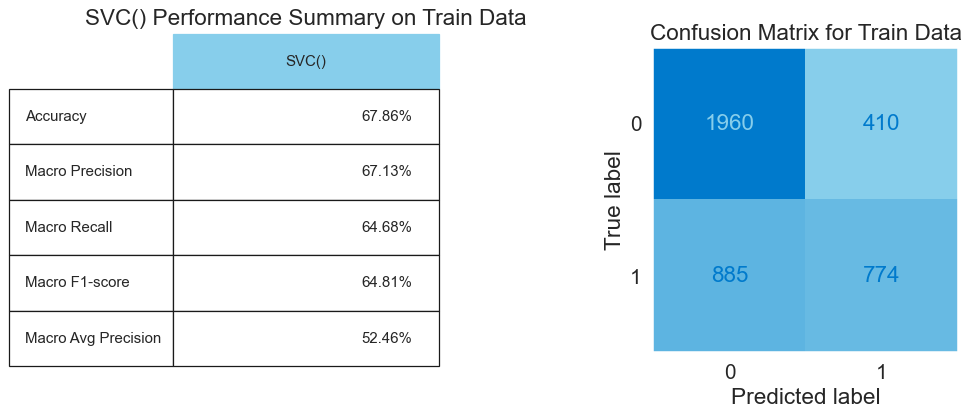

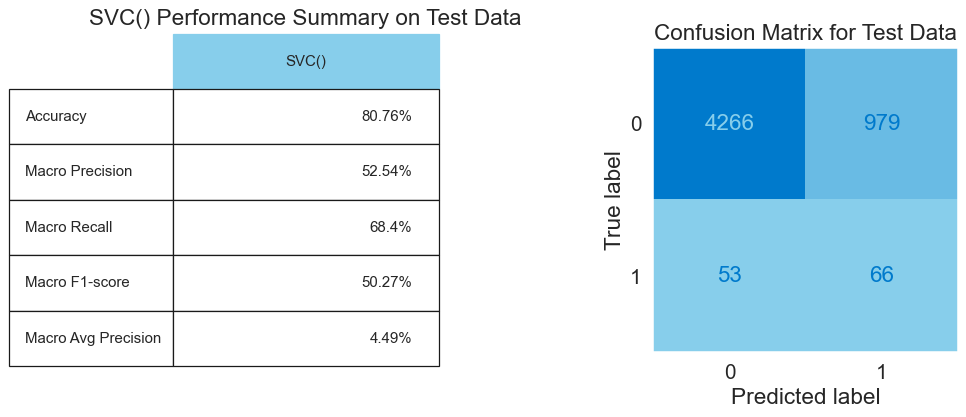

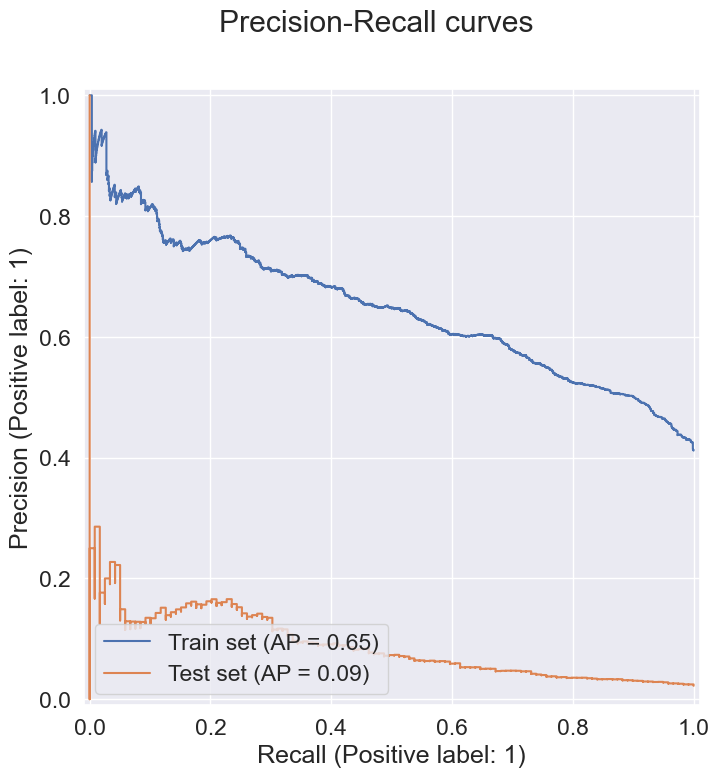

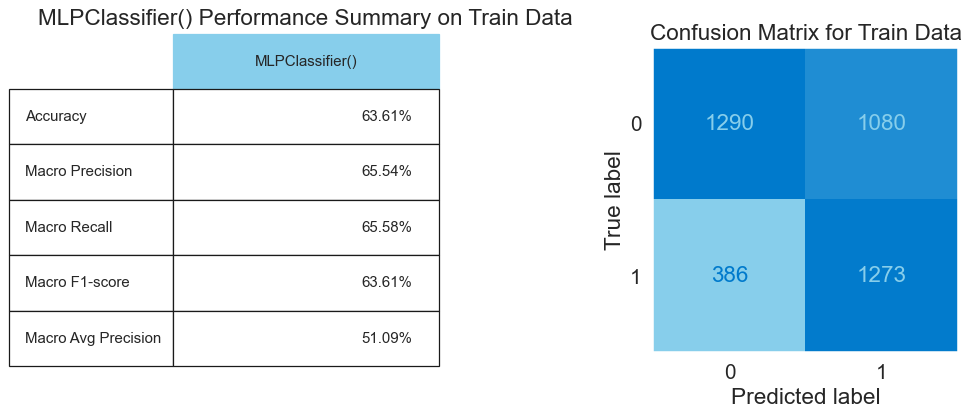

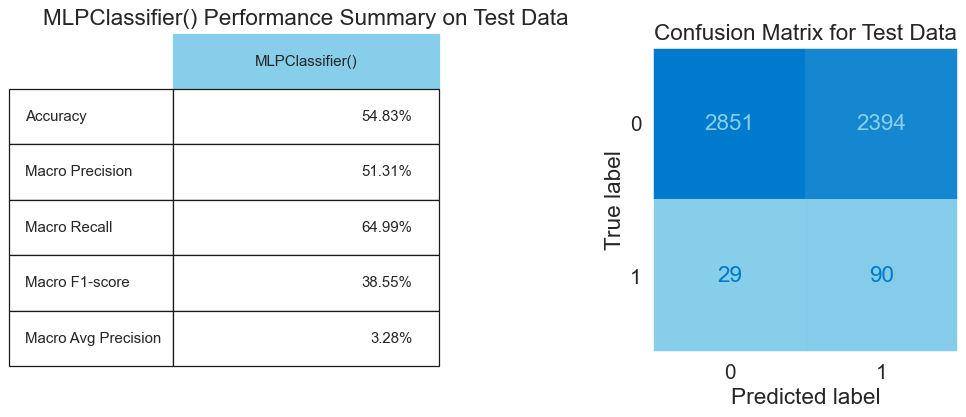

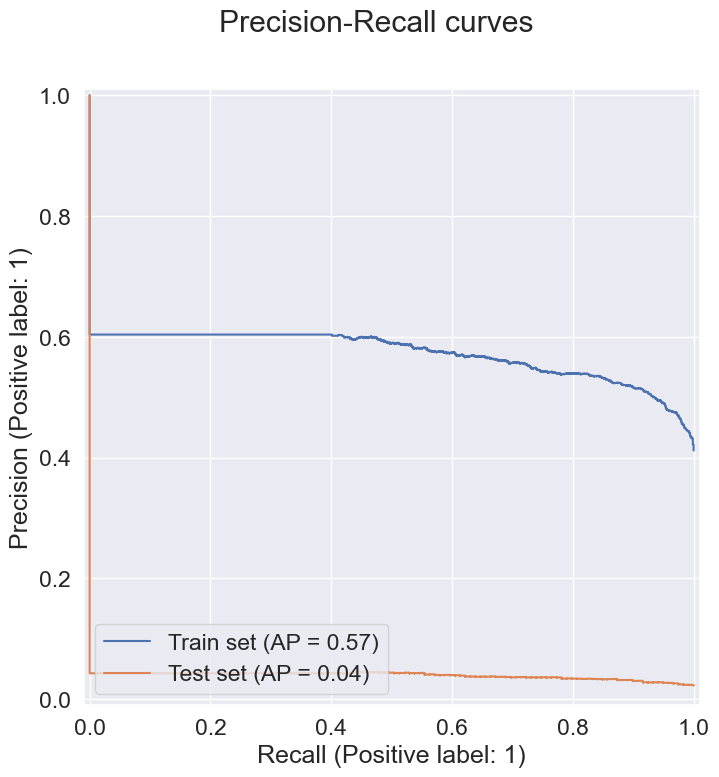

In [233]:
model_selection(models, X_resampled, x_test, y_resampled, y_test)

#### Undersampling

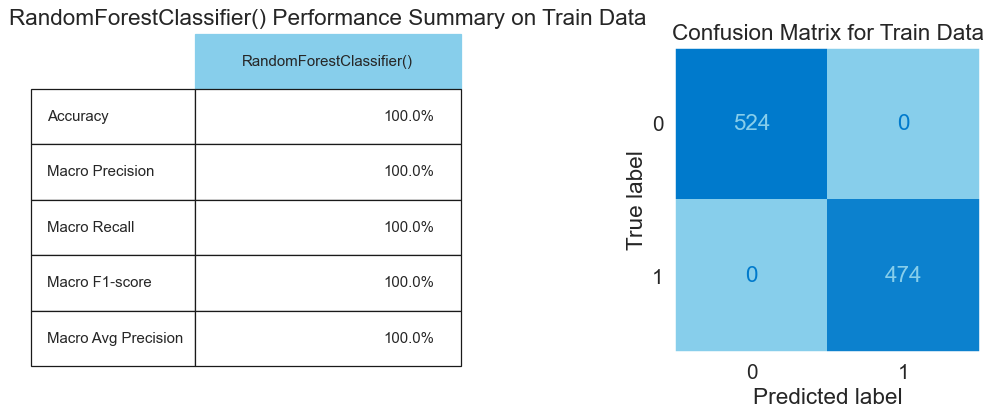

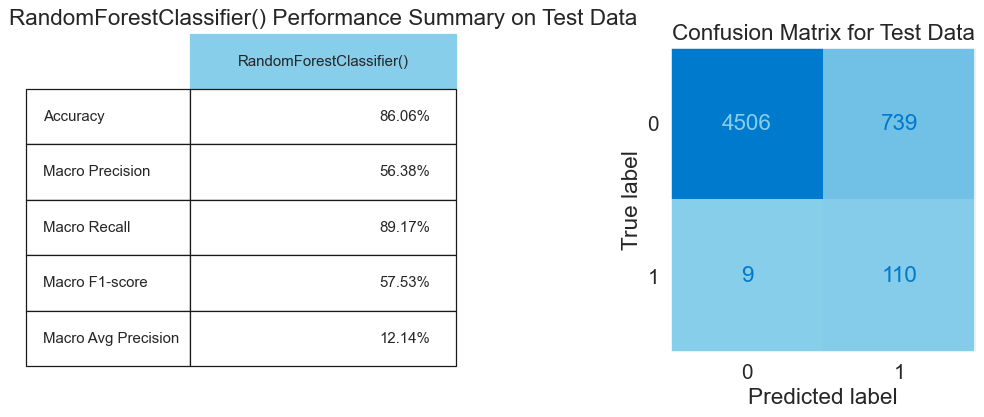

/Users/ivanbashtovyi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


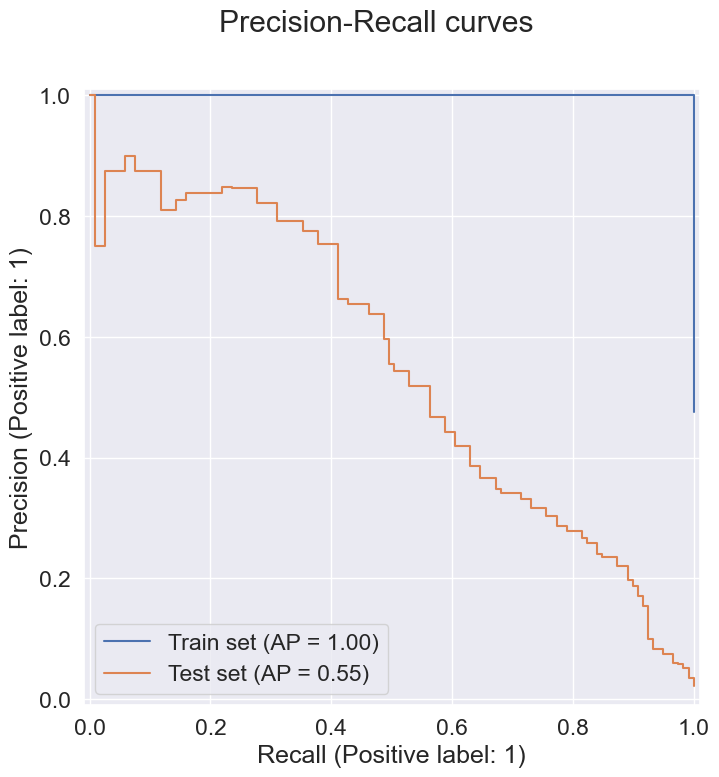

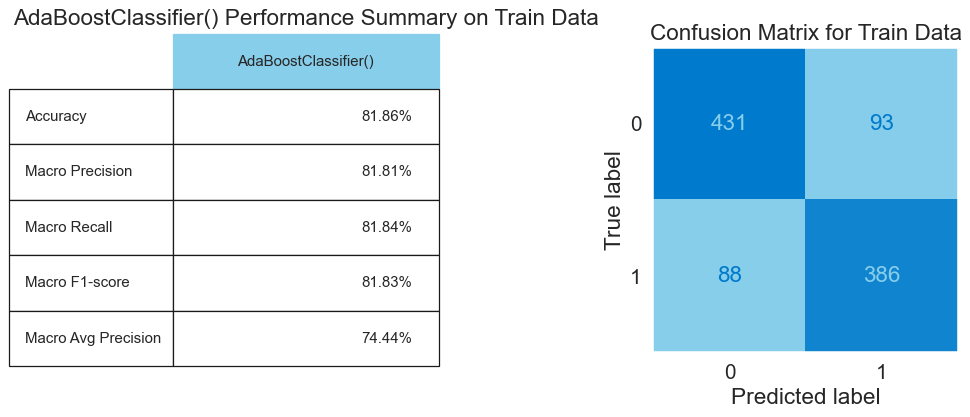

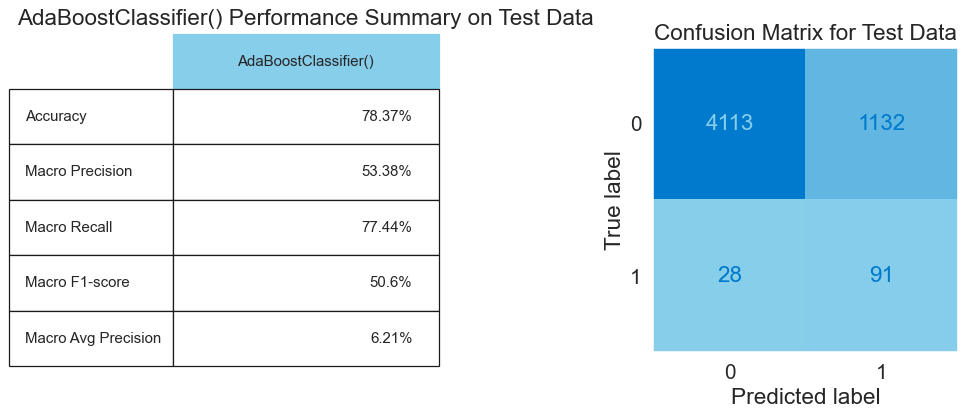

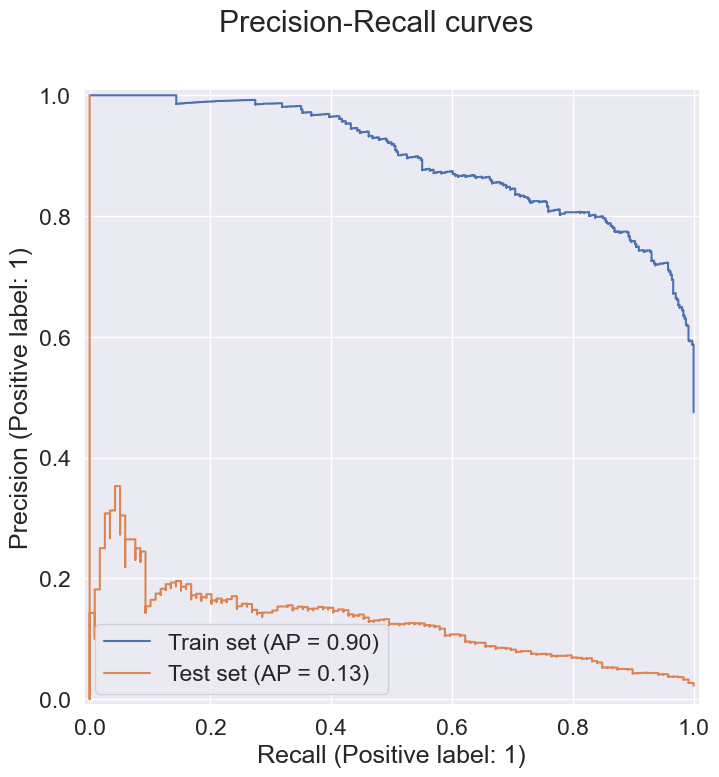

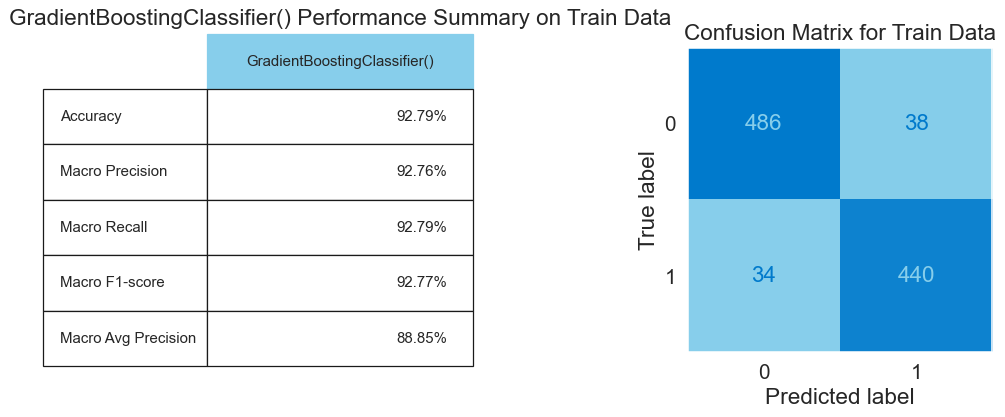

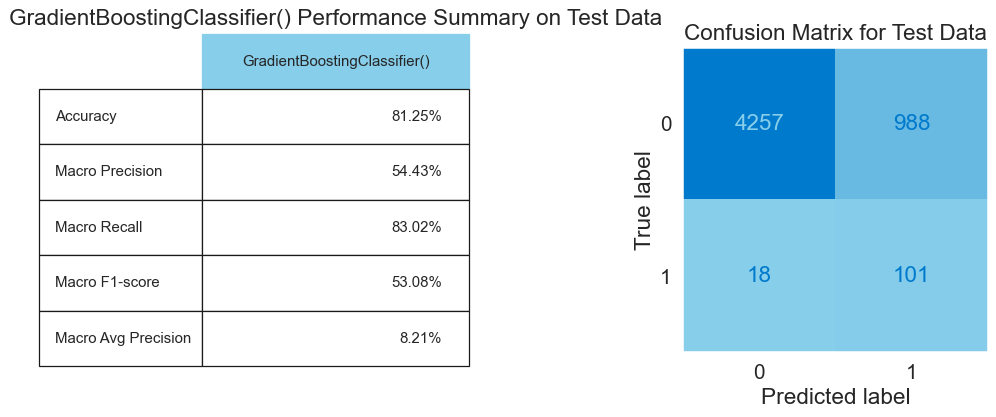

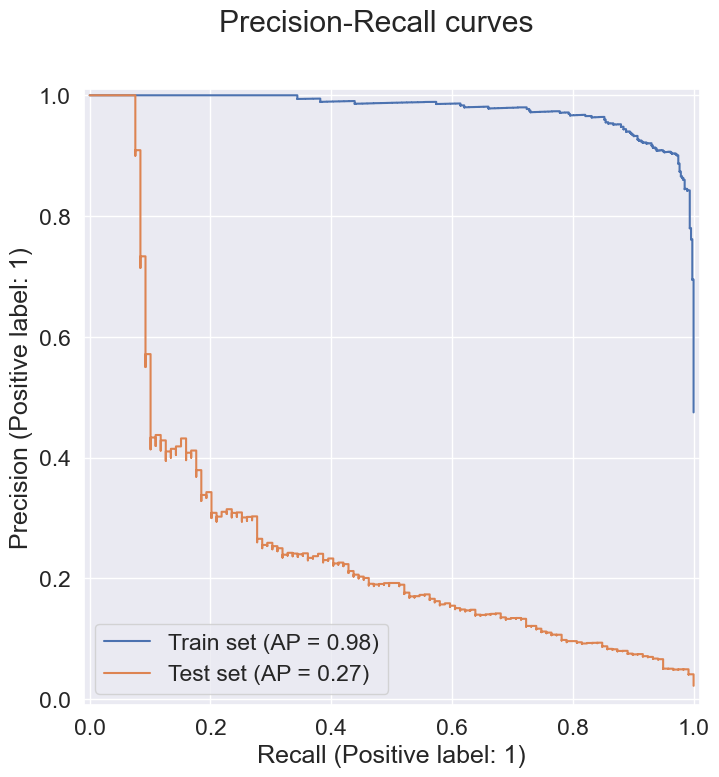

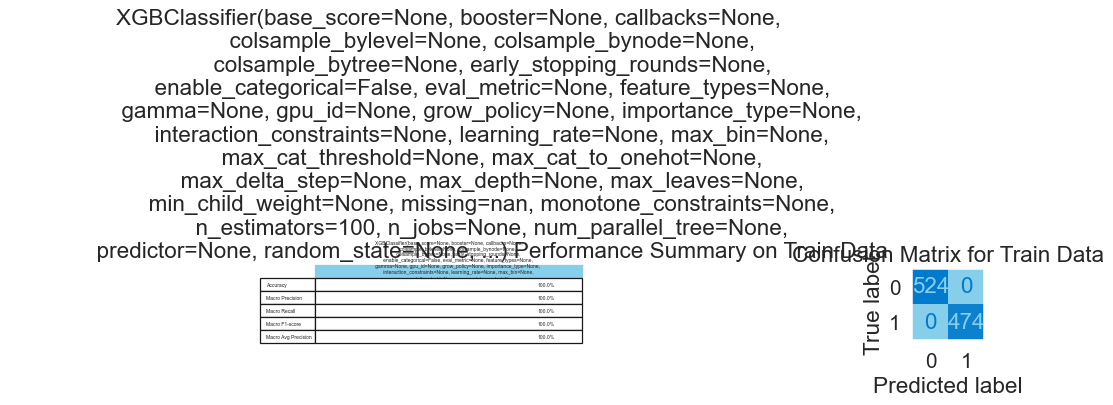

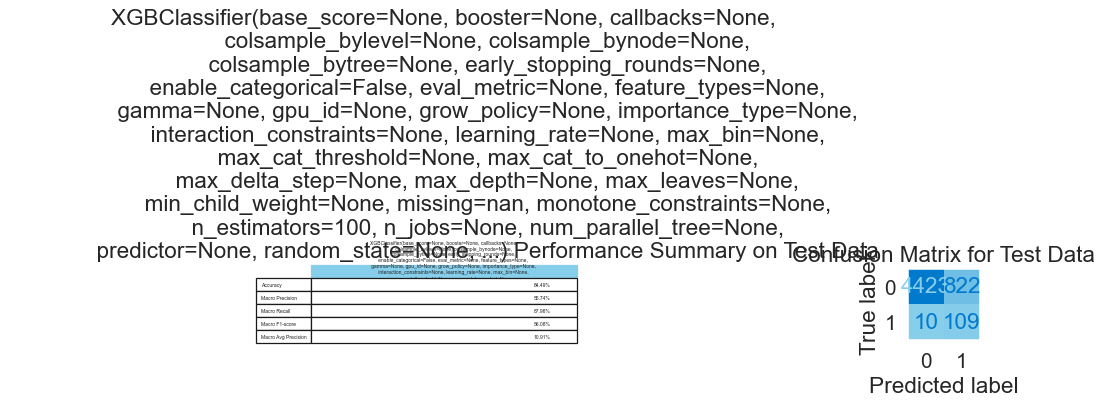

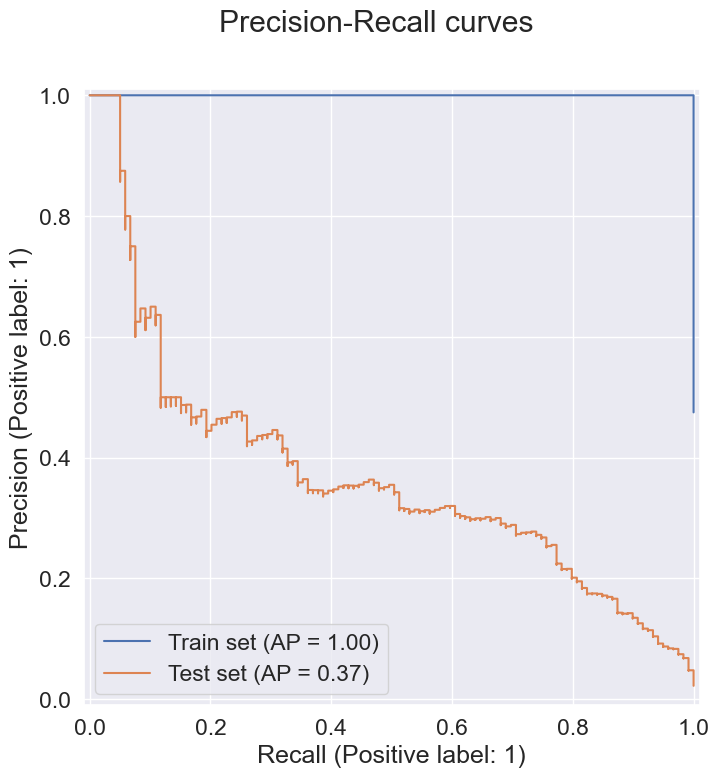

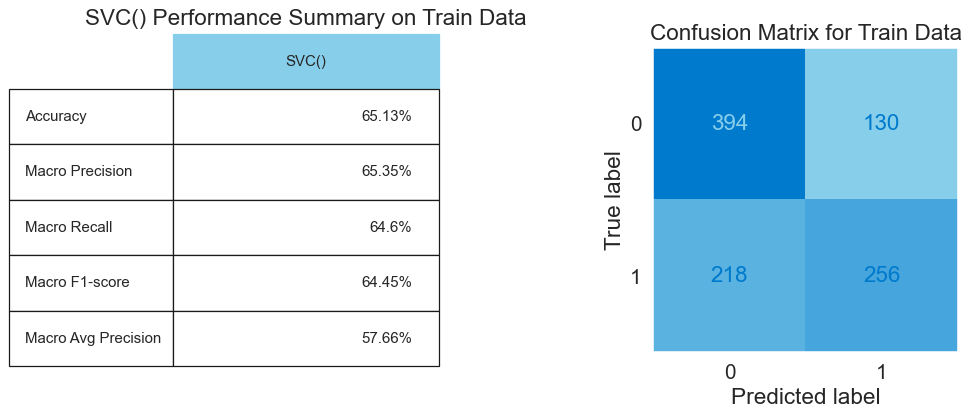

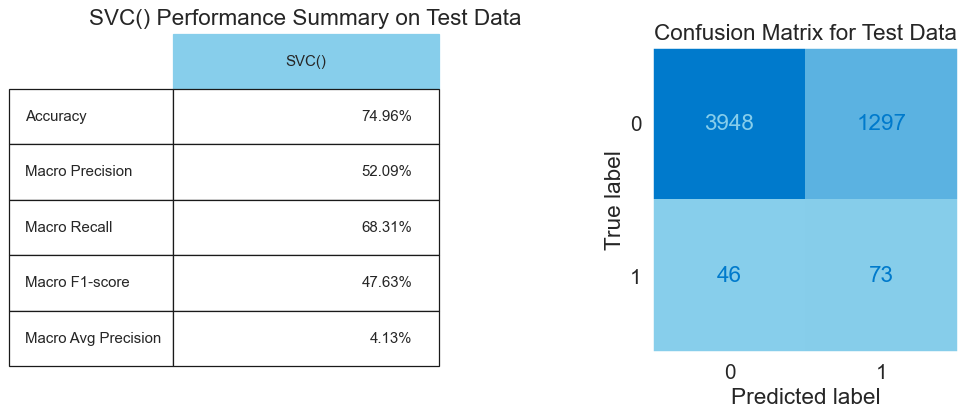

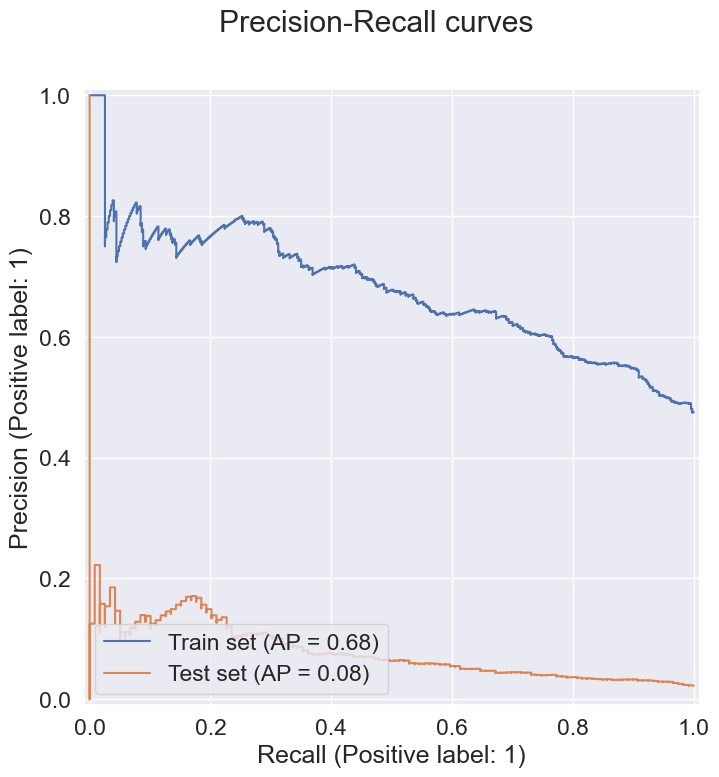

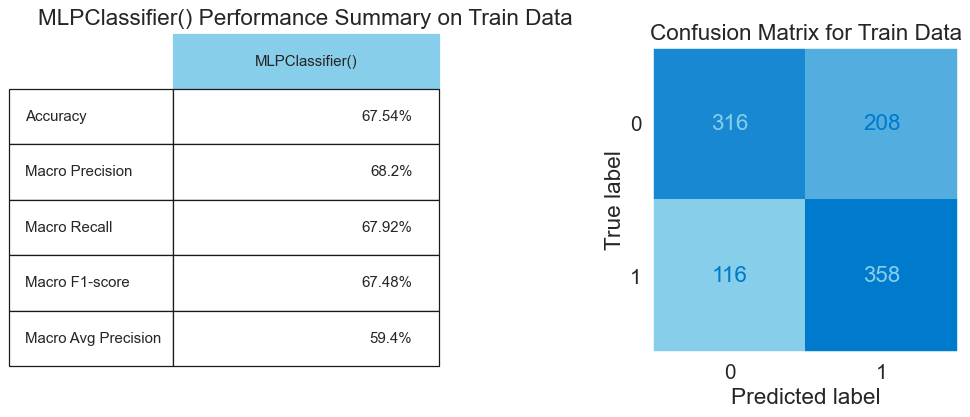

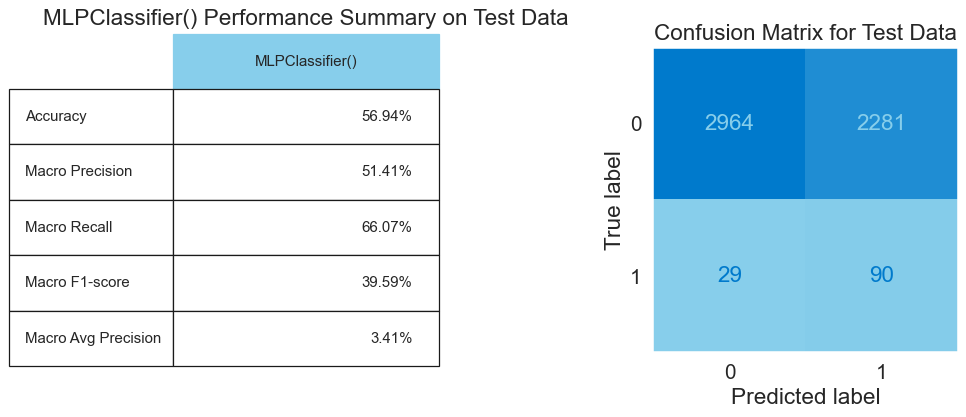

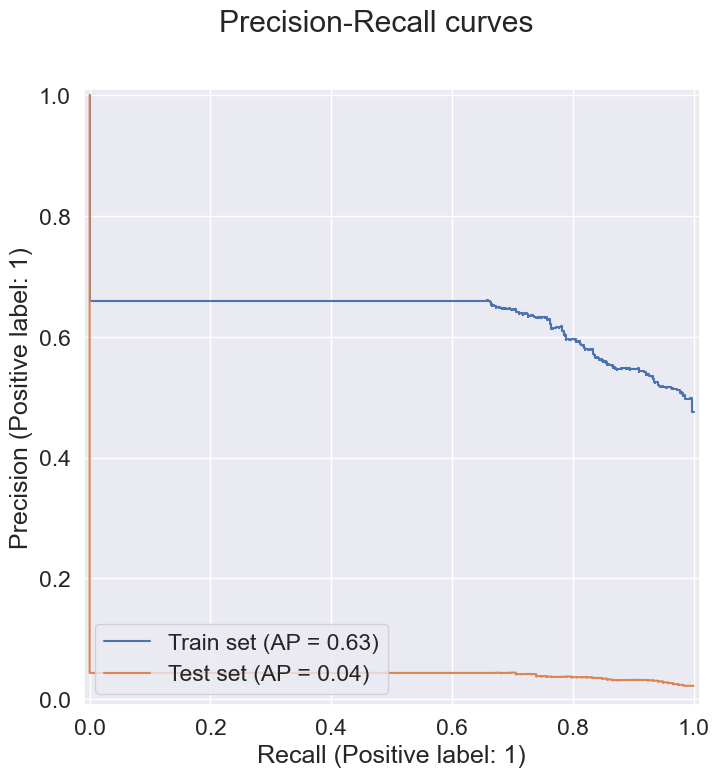

In [234]:
model_selection(models, df_undersampled_train, x_test, df_undersampled_target, y_test)

###  Бачимо, що випадковий ліс без використання синтетичної генерації працює найкраще серед тестованих моделей, але він сільно перенавчається, тож треба зменшіті кількість поділів, щоб знизити складність моделі, та підібрати інші параметри. З екстримальним градієнтним бустингом схожа ситуація - будемо розглядати ці дві моделі. Спробуємо також додати параметри для балансу класів.

#### Взаємозалежнисть к-сті признаків і результату моделі

In [236]:
def select_k_features(numeric_score_grid:np.ndarray, categorical_score_grid:np.ndarray,
                    corr_grid:list, numerical_df:pd.DataFrame, categorical_df:pd.DataFrame, target:pd.Series) -> None:

    
    f1_scores = []
    avg_precisions = []
    parameter_combinations = []
    
    best_f1_score = -1  
    best_avg_precision = -1  
    best_params = None

    for numeric_score_limit in numeric_score_grid:
        for categorical_score_limit in categorical_score_grid:
            for high_corr_limit in corr_grid:

                

                temp = XGBClassifier()
    
                current_params = {'Numeric Score': numeric_score_limit, 'Categorical Score': categorical_score_limit, 'High Corr': high_corr_limit}
                print(f'Current Parameters: {current_params}')
                parameter_combinations.append(current_params)
                    
                categorical_features_best = categorical_df.loc[categorical_df['overall_score'] > categorical_score_limit].index.tolist()
                # print(best_cat_features)
                
                
                
                numerical_features_best = get_best_uncorr_features(
                    features=numerical_df,
                    target=target,
                    score='overall_score',
                    score_treshold=numeric_score_limit,
                    high_corr_treshold=high_corr_limit,
                
                    estimator_title='RandomForest',
                    estimator=RandomForestClassifier(
                        # n_estimators=1000,
                        # max_depth=5,
                        # bootstrap=True,
                        # n_jobs=4,
                        # random_state=42
                    ),
                    figsize=(15, 30)
                ).tolist()
                # print(best_numeric_features)
                
                df_numerical_temp = numerical_df[numerical_features_best]
                df_numerical_temp = df_numerical_temp.join(target)
    
                df_categorical_temp = df_preprocessed[categorical_features_best]
                
                df_temp = df_numerical_temp.join(df_categorical_temp)
                
                df_train_temp = df_temp.drop('gb', axis=1)
                df_target_temp = df_temp['gb']
                
                X_train, X_test, Y_train, Y_test = train_test_split(df_train_temp, df_target_temp, test_size=0.2,
                                                                    stratify=df_target_temp, random_state=42)

                # Validation sample---------------------------
                x_train_temp, x_test_temp, y_train_temp, y_test_temp = train_test_split(X_train, Y_train, test_size=0.2,
                                                    stratify=Y_train, random_state=42)
                
                temp.fit(x_train_temp, y_train_temp)
                result = metrics_calculator(temp, x_test_temp, y_test_temp, 'Random Forest')
    
                print(f"Macro F1-score = {result.loc[result.index == 'Macro F1-score'].values.tolist()[0][0]}")
                print(f"Macro Avg Precision = {result.loc[result.index == 'Macro Avg Precision'].values.tolist()[0][0]}")
                
                current_f1_score = float(result.loc[result.index == 'Macro F1-score'].values.tolist()[0][0].replace('%', ''))
                current_avg_precision = float(result.loc[result.index == 'Macro Avg Precision'].values.tolist()[0][0].replace('%', ''))
                
                if current_f1_score > best_f1_score and current_avg_precision > best_avg_precision:
                    best_f1_score = current_f1_score
                    best_avg_precision = current_avg_precision
                    best_params = current_params
                    
                print(f"best params :{best_params}")
                print(f"best F1 score : {best_f1_score}")
                print(f"best Avg Precision : {best_avg_precision}")
                print('*' * 110)
            
                f1_scores.append(current_f1_score)
                avg_precisions.append(current_avg_precision)

    return f1_scores, avg_precisions, parameter_combinations, best_params

    

In [237]:
numeric_mutual_score_grid = np.arange(0, 0.014, 0.002)
categorical_mutual_score_grid = np.arange(0, 0.014, 0.002)
high_corr_grid = [0.7, 0.8, 0.9, 1.0]


In [238]:
f1_scores, avg_precisions, parameter_combinations, best_params = select_k_features(
                                                                        numeric_mutual_score_grid,
                                                                        categorical_mutual_score_grid,
                                                                        high_corr_grid, df_numerical,
                                                                        importances,
                                                                        df_target_numeric
)

Current Parameters: {'Numeric Score': 0.0, 'Categorical Score': 0.0, 'High Corr': 0.7}
Macro F1-score = 89.43%
Macro Avg Precision = 66.03%
best params :{'Numeric Score': 0.0, 'Categorical Score': 0.0, 'High Corr': 0.7}
best F1 score : 89.43
best Avg Precision : 66.03
**************************************************************************************************************
Current Parameters: {'Numeric Score': 0.0, 'Categorical Score': 0.0, 'High Corr': 0.8}
Macro F1-score = 89.43%
Macro Avg Precision = 66.03%
best params :{'Numeric Score': 0.0, 'Categorical Score': 0.0, 'High Corr': 0.7}
best F1 score : 89.43
best Avg Precision : 66.03
**************************************************************************************************************
Current Parameters: {'Numeric Score': 0.0, 'Categorical Score': 0.0, 'High Corr': 0.9}
Macro F1-score = 89.43%
Macro Avg Precision = 66.03%
best params :{'Numeric Score': 0.0, 'Categorical Score': 0.0, 'High Corr': 0.7}
best F1 score : 89.4

In [239]:
best_params

{'Numeric Score': 0.0, 'Categorical Score': 0.0, 'High Corr': 0.7}

In [240]:
best_numeric_limit= best_params['Numeric Score']
best_categorical_limit= best_params['Categorical Score']
best_corr_limit= best_params['High Corr']

In [241]:
final_df = make_df(importances, df_numerical, df_target_numeric, best_numeric_limit, best_corr_limit, best_categorical_limit)
final_df.shape

(26816, 123)

In [242]:
df_train = final_df.drop('gb', axis=1)
df_target = final_df['gb']

In [243]:
x_train, x_test, y_train, y_test = train_test_split(df_train, df_target, test_size=0.2,
                                                    stratify=df_target, random_state=42)

#### Pipeline and tuning 

In [244]:
def tune_hyperparameters(clf, param_grid, X_train, y_train, X_test, y_test, model_name):

      cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

      clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

      clf_grid.fit(X_train, y_train)

      print("Best hyperparameters:\n", clf_grid.best_params_)

      model_evaluation(clf_grid.best_estimator_, X_train, X_test, y_train, y_test, model_name)

      return clf_grid.best_estimator_


In [245]:
param_grid_xgboost = {
    'under__sampling_strategy': [0.1, 0.2, 0.3, 0.4, 0.5],
    'over__sampling_strategy': [0.6, 0.7, 0.8, 0.9],
    'classifier__n_estimators': [50, 100, 200], 
    'classifier__max_depth': [3, 5, 7], 
    'classifier__learning_rate': [0.01, 0.1, 0.2],  
    'classifier__subsample': [0.8, 0.9, 1.0],  
}

pipeline_xgboost = Pipeline([
    ('under', RandomUnderSampler()),
    ('over', SMOTENC(categorical_features=categorical_columns, random_state=0)),
    ('classifier', XGBClassifier(random_state=42))  
])


/Users/ivanbashtovyi/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters:
 {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8, 'over__sampling_strategy': 0.7, 'under__sampling_strategy': 0.1}


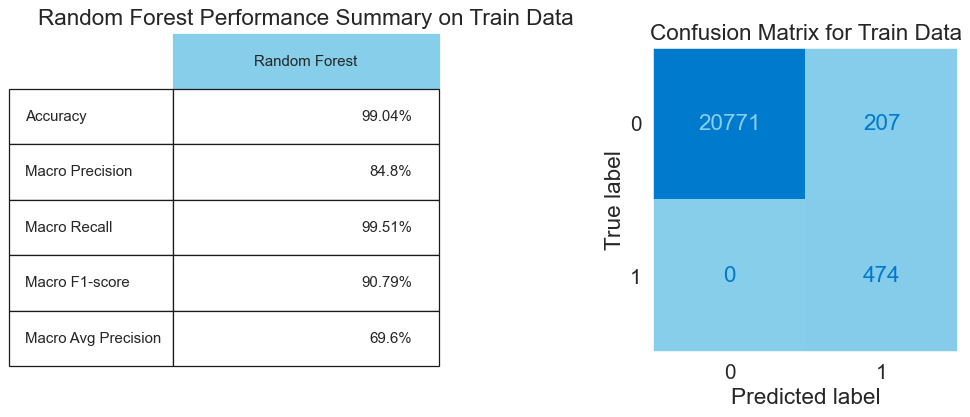

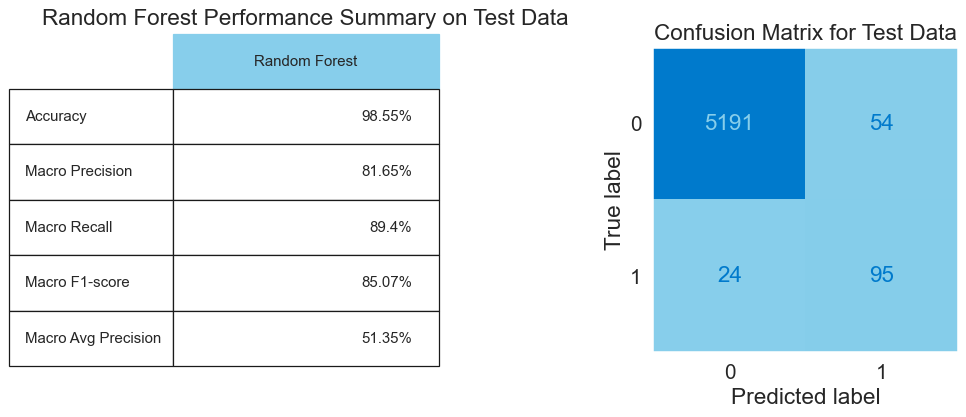

Pipeline(steps=[('under', RandomUnderSampler(sampling_strategy=0.1)),
                ('over',
                 SMOTENC(categorical_features=['id', 'cat_60', 'cat_98',
                                               'cat_38', 'cat_19', 'cat_68'],
                         random_state=0, sampling_strategy=0.7)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [246]:
tuned_xgb = tune_hyperparameters(pipeline_xgboost, param_grid_xgboost, x_train, y_train, x_test, y_test, 'Random Forest')
tuned_xgb

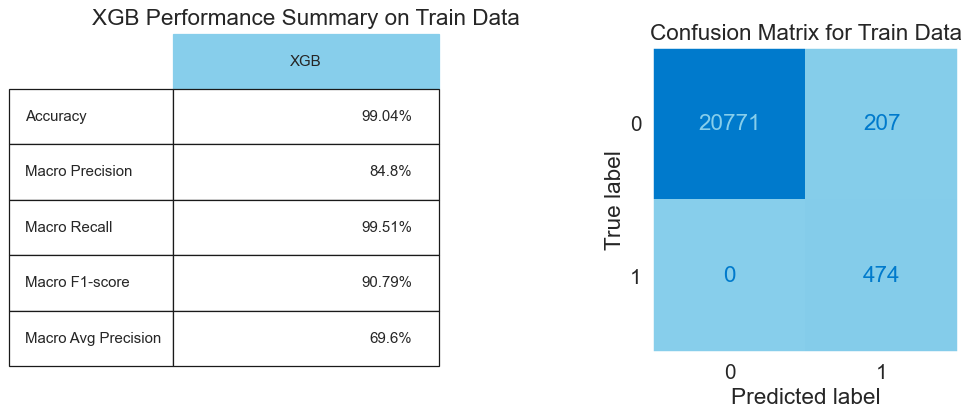

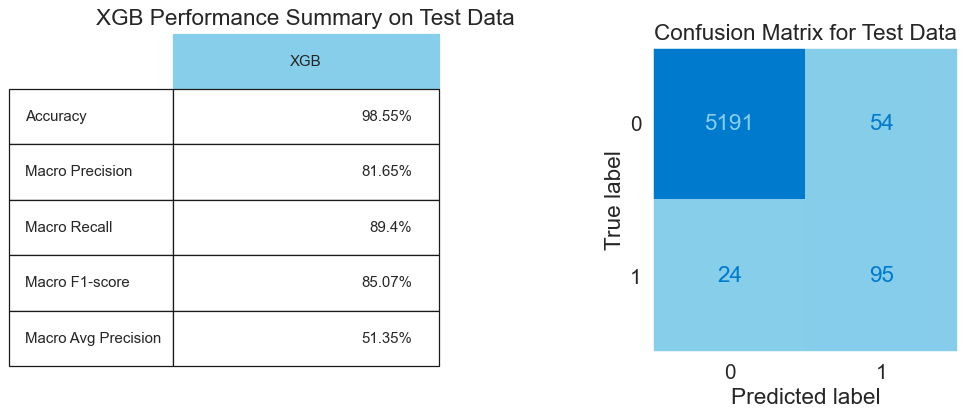

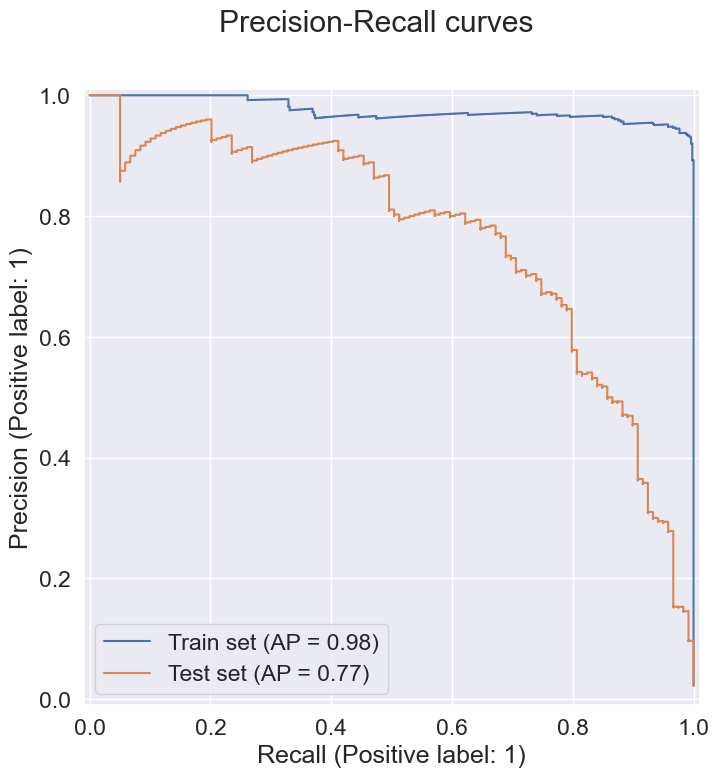

In [248]:
model_evaluation(tuned_xgb, x_train, x_test, y_train, y_test, 'XGB')
precision_recall_display(tuned_xgb, x_train, x_test, y_train, y_test)